Problem Statement: Using this dataset, the firm wants to find opportunities to improve efficiency in operations and understand how the estimated delivery time/distance varies with respect to the actual delivery time/distance.


In [1]:
#Intsalling the Required Libraries
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the Dataframe using Pandas read functions
def custom_date_parser(s):
  return pd.to_datetime(s.split('.')[0])

df = pd.read_csv("data.csv",
                 parse_dates=['trip_creation_time','od_start_time','od_end_time','cutoff_timestamp'],
                 date_parser = custom_date_parser)

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 04:01:19,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
#Seting option for full column view of Data
pd.set_option('display.max_columns', None)

In [5]:
df.head(10)

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,is_cutoff,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,9,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,18,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,27,2018-09-20 04:01:19,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,True,36,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32,2018-09-20 04:47:45,86.0,False,39,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
5,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,True,9,2018-09-20 06:15:58,10.403038,15.0,11.0,12.1171,1.363636,15.0,11.0,12.1171,1.363636
6,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,True,18,2018-09-20 05:47:29,18.045481,44.0,17.0,21.2890,2.588235,28.0,6.0,9.1719,4.666667
7,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,True,27,2018-09-20 05:25:58,28.061896,65.0,29.0,35.8252,2.241379,21.0,11.0,14.5362,1.909091
8,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,True,36,2018-09-20 05:15:56,38.939167,76.0,39.0,47.1900,1.948718,10.0,10.0,11.3648,1.000000
9,training,2018-09-20 02:35:36,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),IND388320AAA,Anand_Vaghasi_IP (Gujarat),2018-09-20 04:47:45,2018-09-20 06:36:55,109.0,False,43,2018-09-20 04:49:20,43.595802,102.0,45.0,53.2334,2.266667,26.0,6.0,6.0434,4.333333


In [6]:
#check the shape of the data
print(f'The data contains {df.shape[1]} columns and {df.shape[0]} rows')

The data contains 24 columns and 144867 rows


In [7]:
#checking the data set information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   data                            144867 non-null  object        
 1   trip_creation_time              144867 non-null  datetime64[ns]
 2   route_schedule_uuid             144867 non-null  object        
 3   route_type                      144867 non-null  object        
 4   trip_uuid                       144867 non-null  object        
 5   source_center                   144867 non-null  object        
 6   source_name                     144574 non-null  object        
 7   destination_center              144867 non-null  object        
 8   destination_name                144606 non-null  object        
 9   od_start_time                   144867 non-null  datetime64[ns]
 10  od_end_time                     144867 non-null  datetim

In [8]:
#checking the null values in data
df.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
#dropping null value rows as its very less values compared to 140K+ data points
df.dropna(axis=0,how ='any',inplace=True)

In [10]:
df.isnull().sum()

data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64

In [11]:
df.describe()

,trip_creation_time,od_start_time,od_end_time,start_scan_to_end_scan,cutoff_factor,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144316,144316,144316,144316.000000,144316.000000,144316,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000,144316.000000
mean,2018-09-22 13:05:08.956789248,2018-09-22 17:32:41.936853760,2018-09-23 09:36:53.558066944,963.697698,233.561345,2018-09-23 02:03:47.732725504,234.708498,417.996237,214.437055,285.549785,2.120178,36.175379,18.495697,22.818993,2.218707
min,2018-09-12 00:00:16,2018-09-12 00:00:16,2018-09-12 00:50:10,20.000000,9.000000,2018-09-12 00:02:09,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.000000,-23.444444
25%,2018-09-17 02:46:11,2018-09-17 07:37:34.500000,2018-09-18 01:29:56,161.000000,22.000000,2018-09-17 18:30:36.750000128,23.352027,51.000000,27.000000,29.896250,1.604545,20.000000,11.000000,12.053975,1.347826
50%,2018-09-22 03:36:19,2018-09-22 07:35:23,2018-09-23 02:49:00,451.000000,66.000000,2018-09-22 19:27:22,66.135322,132.000000,64.000000,78.624400,1.857143,28.000000,17.000000,23.508300,1.684211
75%,2018-09-27 17:53:19,2018-09-27 22:01:30,2018-09-28 12:13:41,1645.000000,286.000000,2018-09-28 04:56:21.500000,286.919294,516.000000,259.000000,346.305400,2.212280,40.000000,22.000000,27.813325,2.250000
max,2018-10-03 23:59:42,2018-10-06 04:27:23,2018-10-08 03:00:24,7898.000000,1927.000000,2018-10-06 23:44:12,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.403700,574.250000
std,NaN,NaN,NaN,1038.082976,345.245823,NaN,345.480571,598.940065,308.448543,421.717826,1.717065,53.524298,14.774008,17.866367,4.854804


In [12]:
df.describe(include="object")

,data,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name
count,144316,144316,144316,144316,144316,144316,144316,144316
unique,2,1497,2,14787,1496,1496,1466,1466
top,training,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153837029526866991,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana)
freq,104632,1812,99132,101,23267,23267,15192,15192


Merging Data based on TripUid, Source_center, Destination_center

In [13]:
df['segment_id'] = df['trip_uuid']+df['source_center']+df['destination_center']
df['segment_actual_time'] = df.groupby('segment_id')['segment_actual_time'].cumsum()
df['segment_osrm_time'] = df.groupby('segment_id')['segment_osrm_time'].cumsum()
df['segment_osrm_distance'] = df.groupby('segment_id')['segment_osrm_distance'].cumsum()

In [14]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor',
       'segment_id'],
      dtype='object')

In [15]:
first_aggregation = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'trip_uuid':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'last',
              'actual_distance_to_destination':'last',
              'actual_time':'last',
              'osrm_time':'last',
              'osrm_distance':'last',
              'segment_actual_time':'last',
              'segment_osrm_time':'last',
              'segment_osrm_distance':'last',
              'data':'count'   
}
grp_by=['trip_uuid', 'source_name', 'destination_name']

In [16]:
segment_df = df.groupby('segment_id').agg(first_aggregation).sort_values(['trip_uuid','od_start_time'],ascending=True).reset_index().rename(columns={'data':'Delivery_Count'})
#counting Delivereies in each Trip
segment_df.head(10)


,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Delivery_Count
0,trip-153671041653548748IND462022AAAIND209304AAA,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16,2018-09-12 16:39:46,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,21
1,trip-153671041653548748IND209304AAAIND000000ACB,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,trip-153671041653548748,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46,2018-09-13 13:40:23,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,18
2,trip-153671042288605164IND572101AAAIND561203AAB,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22,2018-09-12 02:03:09,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,6
3,trip-153671042288605164IND561203AABIND562101AAA,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,trip-153671042288605164,IND561203AAB,Doddablpur_ChikaDPP_D (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09,2018-09-12 03:01:59,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,3
4,trip-153671043369099517IND562132AAAIND000000ACB,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:33,2018-09-14 03:40:17,3099.0,1689.964663,2736.0,1528.0,2072.8556,2700.0,1710.0,2227.5270,77
5,trip-153671043369099517IND000000ACBIND160002AAC,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,trip-153671043369099517,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17,2018-09-14 17:34:55,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,12
6,trip-153671046011330457IND400072AABIND401104AAA,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,trip-153671046011330457,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2
7,trip-153671052974046625IND583101AAAIND583201AAA,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09,2018-09-12 02:34:10,152.0,59.530350,147.0,46.0,63.6461,147.0,45.0,63.6461,3
8,trip-153671052974046625IND583201AAAIND583119AAA,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10,2018-09-12 03:54:43,80.0,26.600536,63.0,27.0,29.5696,63.0,26.0,29.5697,2
9,trip-153671052974046625IND583119AAAIND583101AAA,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 03:54:43,2018-09-12 12:00:30,485.0,41.317614,131.0,44.0,53.5761,130.0,44.0,53.5761,2


In [17]:
segment_df.loc[segment_df['trip_uuid']=='trip-153671052974046625']

,segment_id,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Delivery_Count
7,trip-153671052974046625IND583101AAAIND583201AAA,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583101AAA,Bellary_Dc (Karnataka),IND583201AAA,Hospet (Karnataka),2018-09-12 00:02:09,2018-09-12 02:34:10,152.0,59.530350,147.0,46.0,63.6461,147.0,45.0,63.6461,3
8,trip-153671052974046625IND583201AAAIND583119AAA,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583201AAA,Hospet (Karnataka),IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),2018-09-12 02:34:10,2018-09-12 03:54:43,80.0,26.600536,63.0,27.0,29.5696,63.0,26.0,29.5697,2
9,trip-153671052974046625IND583119AAAIND583101AAA,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,trip-153671052974046625,IND583119AAA,Sandur_WrdN1DPP_D (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 03:54:43,2018-09-12 12:00:30,485.0,41.317614,131.0,44.0,53.5761,130.0,44.0,53.5761,2


In [18]:
second_aggregation = {'trip_creation_time':'first',
              'route_schedule_uuid':'first',
              'route_type':'first',
              'source_center':'first',
              'source_name':'first',
              'destination_center':'last',
              'destination_name':'last',
              'od_start_time':'first',
              'od_end_time':'last',
              'start_scan_to_end_scan':'sum',
              'actual_distance_to_destination':'sum',
              'actual_time':'sum',
              'osrm_time':'sum',
              'osrm_distance':'sum',
              'segment_actual_time':'sum',
              'segment_osrm_time':'sum',
              'segment_osrm_distance':'sum',
              'Delivery_Count':'sum'}

In [19]:
trip_df = segment_df.groupby('trip_uuid').agg(second_aggregation).reset_index()
trip_df.head(10)

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Delivery_Count
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,39
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,9
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,89
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,7
5,trip-153671055416136166,2018-09-12 00:02:34,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34,2018-09-12 03:13:03,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,3
6,trip-153671066201138152,2018-09-12 00:04:22,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22,2018-09-12 01:42:22,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,1
7,trip-153671066826362165,2018-09-12 00:04:28,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28,2018-09-12 03:00:55,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203,4
8,trip-153671074033284934,2018-09-12 00:05:40,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395023AAD,Surat_Central_I_4 (Gujarat),IND395023AAD,Surat_Central_I_4 (Gujarat),2018-09-12 00:05:40,2018-09-12 05:16:28,280.0,25.454848,161.0,29.0,30.9359,161.0,29.0,30.9358,4
9,trip-153671079956500691,2018-09-12 00:06:39,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),2018-09-12 00:06:39,2018-09-12 00:55:59,49.0,9.872146,23.0,8.0,9.9566,23.0,14.0,16.0860,2


In [20]:
trip_df.shape

(14787, 19)

In [21]:
#check the unique trips of the data
print(f'The data contains {trip_df.shape[0]} unique trips')

The data contains 14787 unique trips


In [22]:
trip_df.columns

Index(['trip_uuid', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'Delivery_Count'],
      dtype='object')

In [23]:
num_vars = ['start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance']
#num_vars = ['actual_time']


Feature Extraction

In [24]:
#Extract features like month, year and day etc from Trip_creation_time
trip_df['Year'] = trip_df['trip_creation_time'].dt.year
trip_df['Month'] = trip_df['trip_creation_time'].dt.month
trip_df['Day'] = trip_df['trip_creation_time'].dt.day
trip_df['Hour'] = trip_df['trip_creation_time'].dt.hour
trip_df['Minute'] = trip_df['trip_creation_time'].dt.minute
#end_time['Second'] = end_time['od_end_time'].dt.second
trip_df['DayOfWeek'] = trip_df['trip_creation_time'].dt.dayofweek

In [25]:
trip_df[['trip_creation_time','Year','Month','Day',
         'Hour','Minute','DayOfWeek']].head(10)

,trip_creation_time,Year,Month,Day,Hour,Minute,DayOfWeek
0,2018-09-12 00:00:16,2018,9,12,0,0,2
1,2018-09-12 00:00:22,2018,9,12,0,0,2
2,2018-09-12 00:00:33,2018,9,12,0,0,2
3,2018-09-12 00:01:00,2018,9,12,0,1,2
4,2018-09-12 00:02:09,2018,9,12,0,2,2
5,2018-09-12 00:02:34,2018,9,12,0,2,2
6,2018-09-12 00:04:22,2018,9,12,0,4,2
7,2018-09-12 00:04:28,2018,9,12,0,4,2
8,2018-09-12 00:05:40,2018,9,12,0,5,2
9,2018-09-12 00:06:39,2018,9,12,0,6,2


In [27]:
#Delivery_Time Feature Created
trip_df['DeliveryTime']=(trip_df['od_end_time'] - trip_df['od_start_time']).dt.total_seconds()/(60)
trip_df['DeliveryTime']=round(trip_df['DeliveryTime'],1)

In [28]:
trip_df['DeliveryTime'].head(10)

0    2260.1
1     181.6
2    3934.4
3     100.5
4     718.4
5     190.5
6      98.0
7     176.4
8     310.8
9      49.3
Name: DeliveryTime, dtype: float64

In [29]:
route_counts = trip_df['route_schedule_uuid'].value_counts()
route_counts

route_schedule_uuid
thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d315e6    53
thanos::sroute:8e6cd941-adb5-4f66-b44f-84938f5fca03    46
thanos::sroute:c736b86f-5c1d-4497-832c-876db4c1a518    43
thanos::sroute:ca336899-47aa-4622-9885-b9fbb2302aeb    41
thanos::sroute:5f8fb6cf-814a-426f-b2c9-8665b605d343    40
                                                       ..
thanos::sroute:3aa2ec83-2ca6-4552-991f-c228f5185a2f     1
thanos::sroute:7707bf91-2c3d-42d2-b997-bce3efdd5e4b     1
thanos::sroute:6c3ea140-a3cf-4b78-8838-580c45aa7d76     1
thanos::sroute:22bb1825-736c-4578-964f-1f1e324b4c4b     1
thanos::sroute:2af16556-e1ff-47fc-96a6-69f90eeb590c     1
Name: count, Length: 1497, dtype: int64

In [30]:
#check the Routes of the data
print(f'The data contains {route_counts.shape[0]} unique Routes')

The data contains 1497 unique Routes


In [31]:
trip_df.destination_name

0              Gurgaon_Bilaspur_HB (Haryana)
1          Chikblapur_ShntiSgr_D (Karnataka)
2             Chandigarh_Mehmdpur_H (Punjab)
3             Mumbai_MiraRd_IP (Maharashtra)
4                     Bellary_Dc (Karnataka)
                        ...                 
14782         Chandigarh_Mehmdpur_H (Punjab)
14783         Faridabad_Blbgarh_DC (Haryana)
14784     Kanpur_Central_H_6 (Uttar Pradesh)
14785    Tirunelveli_VdkkuSrt_I (Tamil Nadu)
14786                 Bellary_Dc (Karnataka)
Name: destination_name, Length: 14787, dtype: object

In [32]:
trip_df.isnull().sum()

trip_uuid                         0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
Delivery_Count                    0
Year                              0
Month                             0
Day                               0
Hour                              0
Minute                            0
DayOfWeek                         0
DeliveryTime                      0
dtype: int64

In [33]:
#Split and Extracting Features from Source Name  
trip_df[['source_city_place_code', 'source_state']] = trip_df['source_name'].str.split(' \(', n=1, expand=True)

# Split 'City_Place_Code' into 'City', 'Place', and 'Code'
trip_df[['source_city', 'source_place', 'source_code']] = trip_df['source_city_place_code'].str.split('_', n=2, expand=True)

# Drop intermediate columns
trip_df = trip_df.drop(['source_city_place_code'], axis=1)
trip_df['source_state'] = [value[:-1] for value in trip_df['source_state']]
trip_df


,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Delivery_Count,Year,Month,Day,Hour,Minute,DayOfWeek,DeliveryTime,source_state,source_city,source_place,source_code
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,39,2018,9,12,0,0,2,2260.1,Madhya Pradesh,Bhopal,Trnsport,H
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,9,2018,9,12,0,0,2,181.6,Karnataka,Tumkur,Veersagr,I
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,89,2018,9,12,0,0,2,3934.4,Karnataka,Bangalore,Nelmngla,H
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2,2018,9,12,0,1,2,100.5,Maharashtra,Mumbai Hub,None,None
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,7,2018,9,12,0,2,2,718.4,Karnataka,Bellary,Dc,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,2018-10-03 23:55:56,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56,2018-10-04 06:41:25,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,7,2018,10,3,23,55,2,405.5,Punjab,Chandigarh,Mehmdpur,H
14783,trip-153861104386292051,2018-10-03 23:57:23,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23,2018-10-04 00:57:59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,2,2018,10,3,23,57,2,60.6,Haryana,FBD,Balabhgarh,DPC
14784,trip-153861106442901555,2018-10-03 23:57:44,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44,2018-10-04 06:59:51,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,6,2018,10,3,23,57,2,422.1,Uttar Pradesh,Kanpur,Central,H_6
14785,trip-153861115439069069,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14,2018-10-04 05:47:45,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,17,2018,10,3,23,59,2,348.5,Tamil Nadu,Tirunelveli,VdkkuSrt,I


In [34]:
#Split and Extracting Features from destination Name  
trip_df[['destination_city_place_code', 'destination_state']] = trip_df['destination_name'].str.split(' \(', n=1, expand=True)

# Split 'City_Place_Code' into 'City', 'Place', and 'Code'
trip_df[['destination_city', 'destination_place', 'destination_code']] = trip_df['destination_city_place_code'].str.split('_', n=2, expand=True)

# Drop intermediate columns
trip_df = trip_df.drop(['destination_city_place_code'], axis=1)
trip_df['destination_state'] = [value[:-1] for value in trip_df['destination_state']]
trip_df

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Delivery_Count,Year,Month,Day,Hour,Minute,DayOfWeek,DeliveryTime,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,39,2018,9,12,0,0,2,2260.1,Madhya Pradesh,Bhopal,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,9,2018,9,12,0,0,2,181.6,Karnataka,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,89,2018,9,12,0,0,2,3934.4,Karnataka,Bangalore,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2,2018,9,12,0,1,2,100.5,Maharashtra,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd,IP
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,7,2018,9,12,0,2,2,718.4,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14782,trip-153861095625827784,2018-10-03 23:55:56,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-10-03 23:55:56,2018-10-04 06:41:25,257.0,57.762332,83.0,62.0,73.4630,82.0,62.0,64.8551,7,2018,10,3,23,55,2,405.5,Punjab,Chandigarh,Mehmdpur,H,Punjab,Chandigarh,Mehmdpur,H
14783,trip-153861104386292051,2018-10-03 23:57:23,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121004AAA,Faridabad_Blbgarh_DC (Haryana),2018-10-03 23:57:23,2018-10-04 00:57:59,60.0,15.513784,21.0,12.0,16.0882,21.0,11.0,16.0883,2,2018,10,3,23,57,2,60.6,Haryana,FBD,Balabhgarh,DPC,Haryana,Faridabad,Blbgarh,DC
14784,trip-153861106442901555,2018-10-03 23:57:44,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),IND209304AAA,Kanpur_Central_H_6 (Uttar Pradesh),2018-10-03 23:57:44,2018-10-04 06:59:51,421.0,38.684839,282.0,48.0,58.9037,281.0,88.0,104.8866,6,2018,10,3,23,57,2,422.1,Uttar Pradesh,Kanpur,Central,H_6,Uttar Pradesh,Kanpur,Central,H_6
14785,trip-153861115439069069,2018-10-03 23:59:14,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),IND627005AAA,Tirunelveli_VdkkuSrt_I (Tamil Nadu),2018-10-03 23:59:14,2018-10-04 05:47:45,347.0,134.723836,264.0,179.0,171.1103,258.0,221.0,223.5324,17,2018,10,3,23,59,2,348.5,Tamil Nadu,Tirunelveli,VdkkuSrt,I,Tamil Nadu,Tirunelveli,VdkkuSrt,I

In [35]:
trip_df.head(10)

,trip_uuid,trip_creation_time,route_schedule_uuid,route_type,source_center,source_name,destination_center,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,Delivery_Count,Year,Month,Day,Hour,Minute,DayOfWeek,DeliveryTime,source_state,source_city,source_place,source_code,destination_state,destination_city,destination_place,destination_code
0,trip-153671041653548748,2018-09-12 00:00:16,thanos::sroute:d7c989ba-a29b-4a0b-b2f4-288cdc6...,FTL,IND462022AAA,Bhopal_Trnsport_H (Madhya Pradesh),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-12 00:00:16,2018-09-13 13:40:23,2259.0,824.732854,1562.0,717.0,991.3523,1548.0,1008.0,1320.4733,39,2018,9,12,0,0,2,2260.1,Madhya Pradesh,Bhopal,Trnsport,H,Haryana,Gurgaon,Bilaspur,HB
1,trip-153671042288605164,2018-09-12 00:00:22,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,IND572101AAA,Tumkur_Veersagr_I (Karnataka),IND562101AAA,Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 00:00:22,2018-09-12 03:01:59,180.0,73.186911,143.0,68.0,85.1110,141.0,65.0,84.1894,9,2018,9,12,0,0,2,181.6,Karnataka,Tumkur,Veersagr,I,Karnataka,Chikblapur,ShntiSgr,D
2,trip-153671043369099517,2018-09-12 00:00:33,thanos::sroute:de5e208e-7641-45e6-8100-4d9fb1e...,FTL,IND562132AAA,Bangalore_Nelmngla_H (Karnataka),IND160002AAC,Chandigarh_Mehmdpur_H (Punjab),2018-09-12 00:00:33,2018-09-14 17:34:55,3933.0,1927.404273,3347.0,1740.0,2354.0665,3308.0,1941.0,2545.2678,89,2018,9,12,0,0,2,3934.4,Karnataka,Bangalore,Nelmngla,H,Punjab,Chandigarh,Mehmdpur,H
3,trip-153671046011330457,2018-09-12 00:01:00,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,IND400072AAB,Mumbai Hub (Maharashtra),IND401104AAA,Mumbai_MiraRd_IP (Maharashtra),2018-09-12 00:01:00,2018-09-12 01:41:29,100.0,17.175274,59.0,15.0,19.6800,59.0,16.0,19.8766,2,2018,9,12,0,1,2,100.5,Maharashtra,Mumbai Hub,None,None,Maharashtra,Mumbai,MiraRd,IP
4,trip-153671052974046625,2018-09-12 00:02:09,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,IND583101AAA,Bellary_Dc (Karnataka),IND583101AAA,Bellary_Dc (Karnataka),2018-09-12 00:02:09,2018-09-12 12:00:30,717.0,127.448500,341.0,117.0,146.7918,340.0,115.0,146.7919,7,2018,9,12,0,2,2,718.4,Karnataka,Bellary,Dc,None,Karnataka,Bellary,Dc,None
5,trip-153671055416136166,2018-09-12 00:02:34,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,IND600116AAB,Chennai_Porur_DPC (Tamil Nadu),IND602105AAB,Chennai_Sriperumbudur_Dc (Tamil Nadu),2018-09-12 00:02:34,2018-09-12 03:13:03,189.0,24.597048,61.0,23.0,28.0647,60.0,23.0,28.0647,3,2018,9,12,0,2,2,190.5,Tamil Nadu,Chennai,Porur,DPC,Tamil Nadu,Chennai,Sriperumbudur,Dc
6,trip-153671066201138152,2018-09-12 00:04:22,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,IND600044AAD,Chennai_Chrompet_DPC (Tamil Nadu),IND600048AAA,Chennai_Vandalur_Dc (Tamil Nadu),2018-09-12 00:04:22,2018-09-12 01:42:22,98.0,9.100510,24.0,13.0,12.0184,24.0,13.0,12.0184,1,2018,9,12,0,4,2,98.0,Tamil Nadu,Chennai,Chrompet,DPC,Tamil Nadu,Chennai,Vandalur,Dc
7,trip-153671066826362165,2018-09-12 00:04:28,thanos::sroute:d5b71ae9-a11a-4f52-bcb7-274b65e...,Carting,IND560043AAC,HBR Layout PC (Karnataka),IND560043AAC,HBR Layout PC (Karnataka),2018-09-12 00:04:28,2018-09-12 03:00:55,146.0,22.424210,64.0,34.0,28.9203,64.0,34.0,28.9203,4,2018,9,12,0,4,2,176.4,Karnataka,HBR Layout PC,None,None,Karnataka,HBR Layout PC,None,None
8,trip-153671074033284934,2018-09-12 00:05:40,thanos::sroute:a0e60427-16ad-4b17-b3b0-6a06643...,Carting,IND395023AAD,Surat_Central_I_4 (Gujarat),IND395023AAD,Surat_Central_I_4 (Gujarat),2018-09-12 00:05:40,2018-09-12 05:16:28,280.0,25.454848,161.0,29.0,30.9359,161.0,29.0,30.9358,4,2018,9,12,0,5,2,310.8,Gujarat,Surat,Central,I_4,Gujarat,Surat,Central,I_4
9,trip-153671079956500691,2018-09-12 00:06:39,thanos::sroute:a10888ff-f794-41e1-9b7a-7f62ef6...,Carting,IND110024AAA,Delhi_Lajpat_IP (Delhi),IND110014AAA,Delhi_Bhogal (Delhi),2018-09-12 00:06:3

In [36]:
trip_df.isnull().sum()

trip_uuid                            0
trip_creation_time                   0
route_schedule_uuid                  0
route_type                           0
source_center                        0
source_name                          0
destination_center                   0
destination_name                     0
od_start_time                        0
od_end_time                          0
start_scan_to_end_scan               0
actual_distance_to_destination       0
actual_time                          0
osrm_time                            0
osrm_distance                        0
segment_actual_time                  0
segment_osrm_time                    0
segment_osrm_distance                0
Delivery_Count                       0
Year                                 0
Month                                0
Day                                  0
Hour                                 0
Minute                               0
DayOfWeek                            0
DeliveryTime             

In [37]:
#dropping Place and Code for further ananlsis as not needed currently
trip_df = trip_df.drop(['source_place','source_code','destination_place','destination_code'], axis=1)

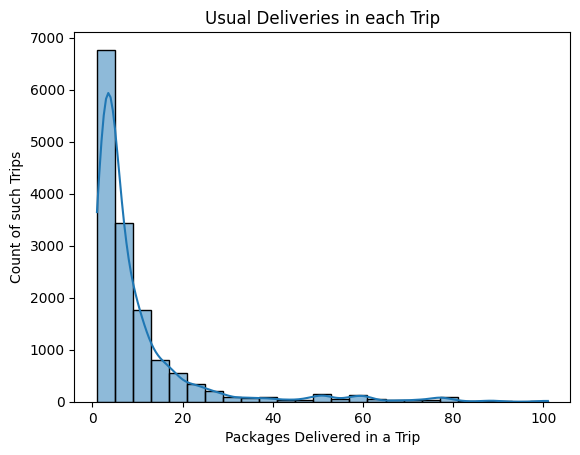

In [38]:
sns.histplot(trip_df["Delivery_Count"],kde=True,bins=25)
plt.xlabel('Packages Delivered in a Trip')
plt.ylabel('Count of such Trips')
plt.title('Usual Deliveries in each Trip')
plt.show()

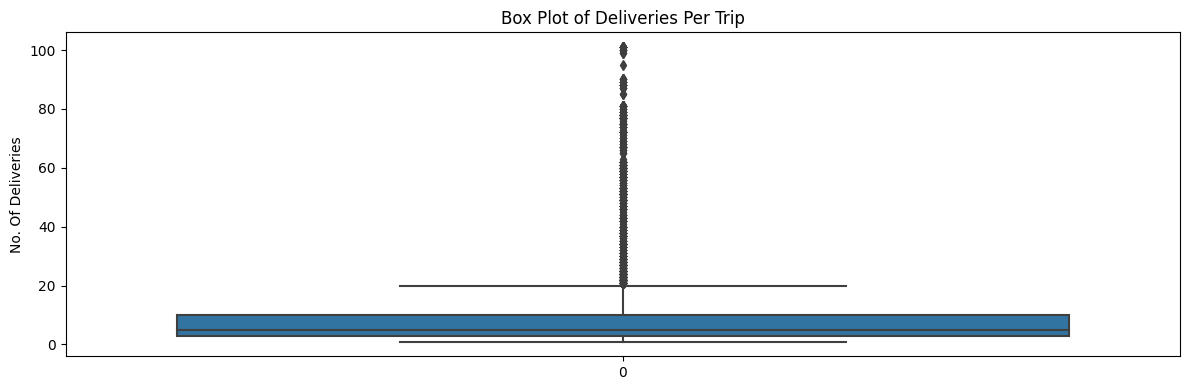

In [39]:
plt.figure(figsize=(12,4))
sns.boxplot(trip_df["Delivery_Count"])
plt.ylabel('No. Of Deliveries')
plt.title('Box Plot of Deliveries Per Trip')
plt.tight_layout()
plt.show()

Most of the Trips have less than 20 Delhiveries in a Trip. Some Trips have upto 100 Trips as well.

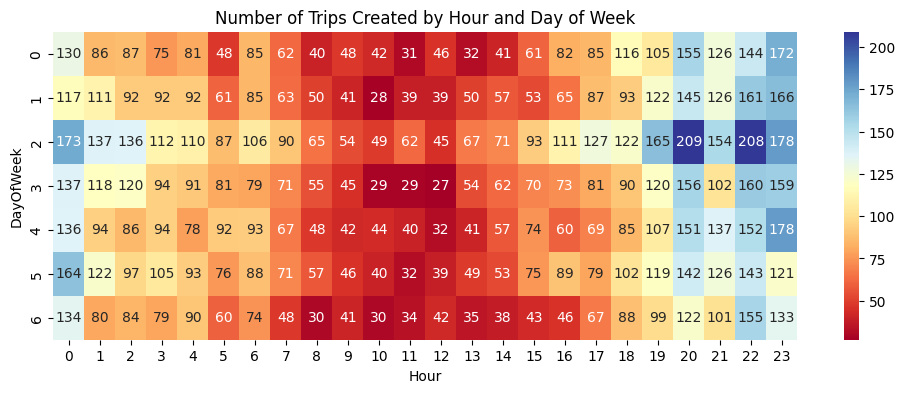

In [40]:
#Number of Trips by hour and Day of week
data = pd.pivot_table(data=trip_df, index='DayOfWeek', columns='Hour', values='trip_uuid', aggfunc='count')
plt.figure(figsize=(12,4))
sns.heatmap(data, cmap='RdYlBu',annot=True, fmt='d')
plt.title('Number of Trips Created by Hour and Day of Week')

plt.show()

Most of the Trips are created at late hours between 8pm to 1am. Wednesday is a busyy Day.

In [41]:
#DeliveryTime Time
del_trip = trip_df[['trip_uuid','route_schedule_uuid',
       'route_type','start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance','Delivery_Count','DayOfWeek', 'DeliveryTime','od_start_time','od_end_time',
       'source_state', 'source_city', 'destination_state', 'destination_city']]


In [42]:
#Trip_creation_time: Extract features like month, year and day etc

del_trip['TripEndDay'] = del_trip['od_end_time'].dt.day
del_trip['TripEndHour'] = del_trip['od_end_time'].dt.hour
#del_trip['Minute'] = del_trip['od_end_time'].dt.minute
#end_time['Second'] = end_time['od_end_time'].dt.second
del_trip['TripEndDayOfWeek'] = del_trip['od_end_time'].dt.dayofweek

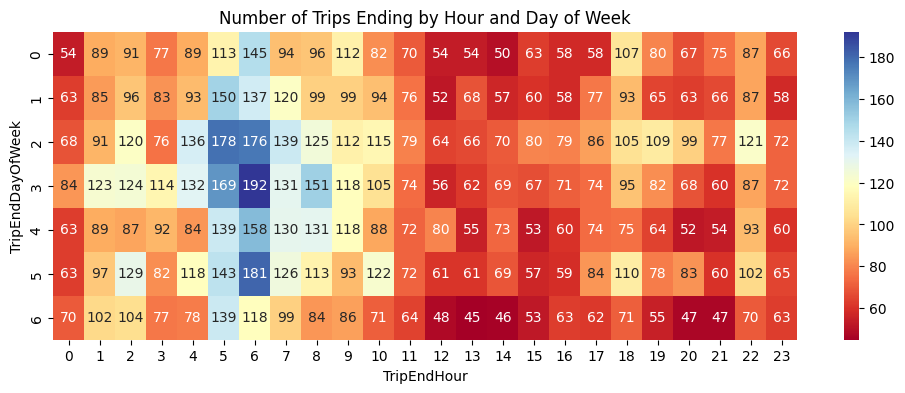

In [43]:
#Number of Trips by hour and Day of week
data = pd.pivot_table(data=del_trip, index='TripEndDayOfWeek', columns='TripEndHour', values='trip_uuid', aggfunc='count')
plt.figure(figsize=(12,4))
sns.heatmap(data, cmap='RdYlBu',annot=True, fmt='d')
plt.title('Number of Trips Ending by Hour and Day of Week')

plt.show()

Most Trips Ends between 5am and 6am , which means higher traffic is oberved from early hours of the day.
Sunday and Monday has less trips ended.

#Handling Outliers


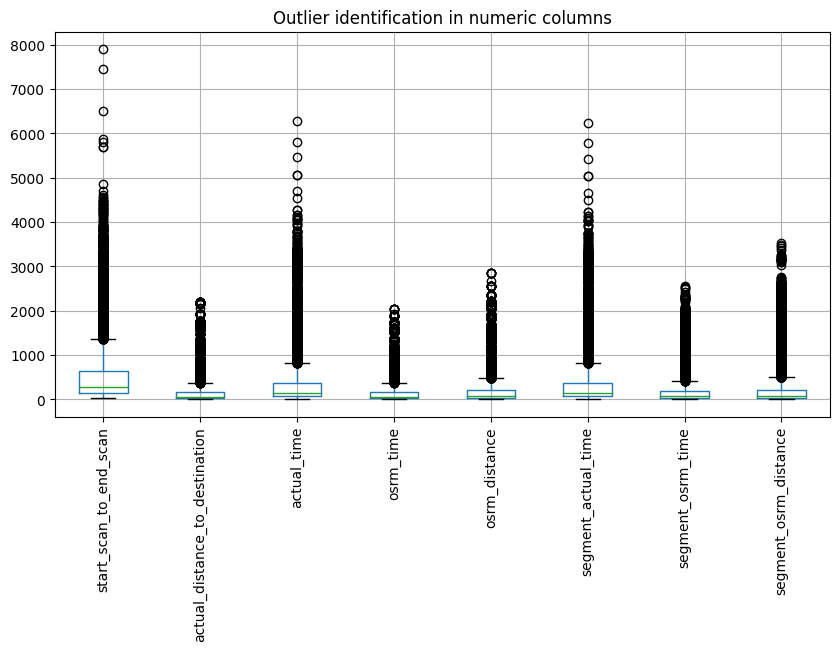

In [44]:
trip_df[num_vars].boxplot(figsize=(10,5))
plt.xticks(rotation=90)
plt.title('Outlier identification in numeric columns')
plt.show()

In [45]:
#Calculating IQR (Inter Quartile Range)
q1 = trip_df[num_vars].quantile(0.25)
q3 = trip_df[num_vars].quantile(0.75)

iqr = q3-q1
iqr

start_scan_to_end_scan            483.000000
actual_distance_to_destination    140.814159
actual_time                       300.000000
osrm_time                         139.000000
osrm_distance                     175.887300
segment_actual_time               298.000000
segment_osrm_time                 154.000000
segment_osrm_distance             183.981750
dtype: float64

In [46]:
trip_df = trip_df[~((trip_df[num_vars]<q1-(1.5*iqr)) | (trip_df[num_vars]>q3+(1.5*iqr))).any(axis=1)].reset_index()

In [47]:
trip_df.shape

(12723, 31)

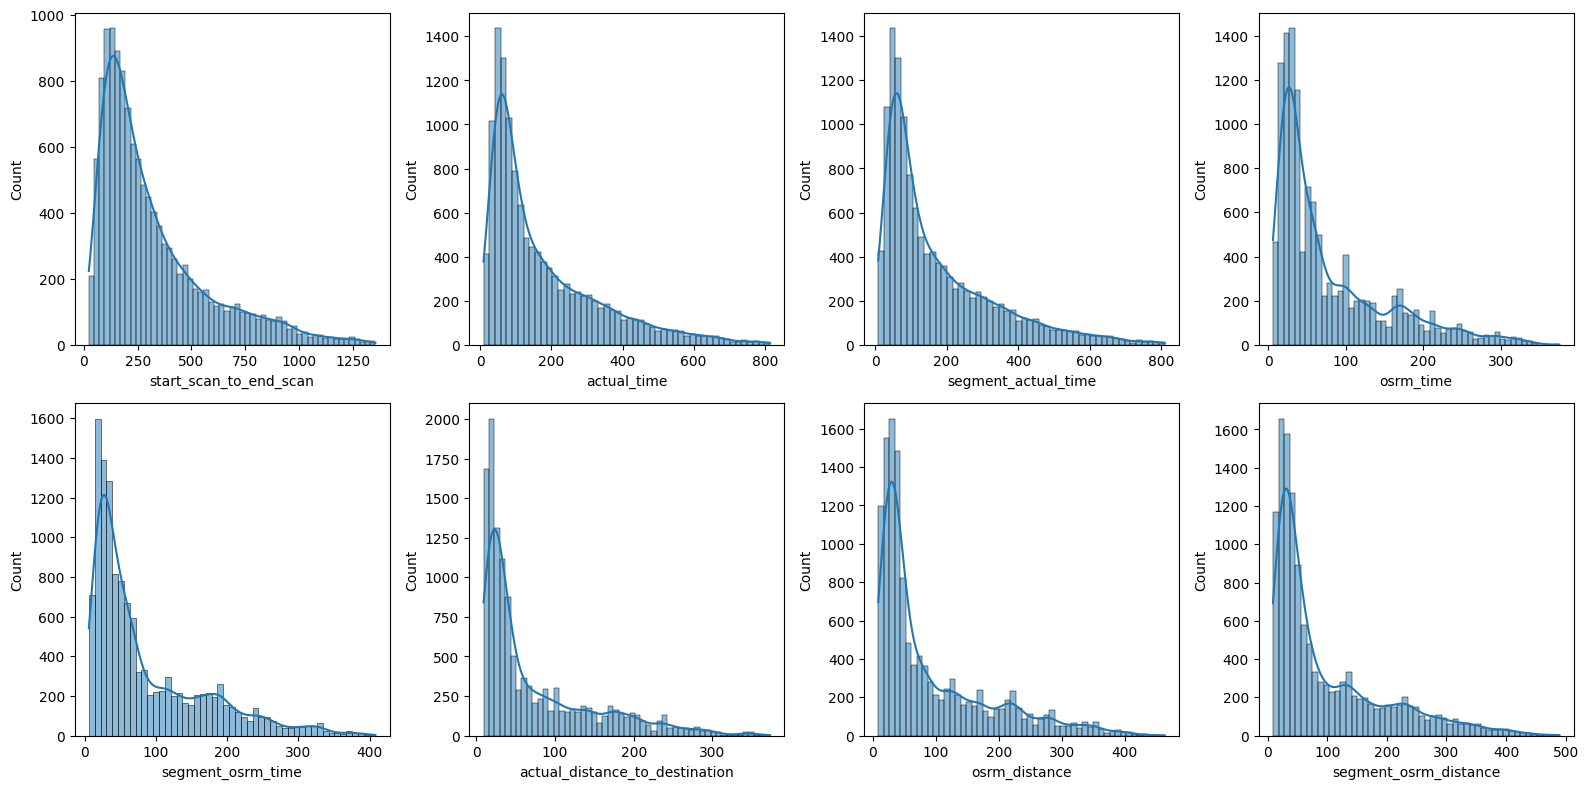

In [48]:
#Distribution plots of continuous features

fig, ax = plt.subplots(2,4, figsize=(16,8))

sns.histplot(data=trip_df['start_scan_to_end_scan'], kde=True, ax=ax[0,0])
sns.histplot(data=trip_df['actual_time'], kde=True, ax=ax[0,1])
sns.histplot(data=trip_df['segment_actual_time'], kde=True, ax=ax[0,2])
sns.histplot(data=trip_df['osrm_time'], kde=True, ax=ax[0,3])
sns.histplot(data=trip_df['segment_osrm_time'], kde=True, ax=ax[1,0])
sns.histplot(data=trip_df['actual_distance_to_destination'], kde=True, ax=ax[1,1])
sns.histplot(data=trip_df['osrm_distance'], kde=True, ax=ax[1,2])
sns.histplot(data=trip_df['segment_osrm_distance'], kde=True, ax=ax[1,3])

plt.tight_layout()
plt.show()

In [49]:
#finding Unique states from where Deliery is initiated
Src_State=trip_df["source_state"].value_counts()
Src_State

source_state
Maharashtra               2300
Karnataka                 2036
Haryana                   1331
Tamil Nadu                1045
Delhi                      667
Telangana                  662
Gujarat                    657
Uttar Pradesh              618
West Bengal                551
Punjab                     533
Rajasthan                  436
Andhra Pradesh             393
Bihar                      267
Kerala                     261
Madhya Pradesh             250
Assam                      220
Jharkhand                  123
Orissa                      94
Uttarakhand                 93
Chandigarh                  48
Chhattisgarh                42
Goa                         34
Jammu & Kashmir             16
Dadra and Nagar Haveli      15
Pondicherry                 12
Himachal Pradesh            12
Nagaland                     4
Arunachal Pradesh            3
Name: count, dtype: int64

In [50]:
#finding Unique states from where Deliery is done
Des_state=trip_df["destination_state"].value_counts()
Des_state

destination_state
Maharashtra               2291
Karnataka                 2064
Haryana                   1343
Tamil Nadu                1028
Telangana                  674
Gujarat                    653
Uttar Pradesh              618
Punjab                     588
Delhi                      581
West Bengal                559
Rajasthan                  465
Andhra Pradesh             384
Bihar                      267
Madhya Pradesh             254
Kerala                     250
Assam                      193
Jharkhand                  123
Uttarakhand                 94
Orissa                      89
Chhattisgarh                42
Goa                         32
Chandigarh                  29
Himachal Pradesh            25
Arunachal Pradesh           22
Dadra and Nagar Haveli      17
Jammu & Kashmir             15
Pondicherry                 10
Meghalaya                    8
Mizoram                      2
Nagaland                     1
Tripura                      1
Daman & Diu          

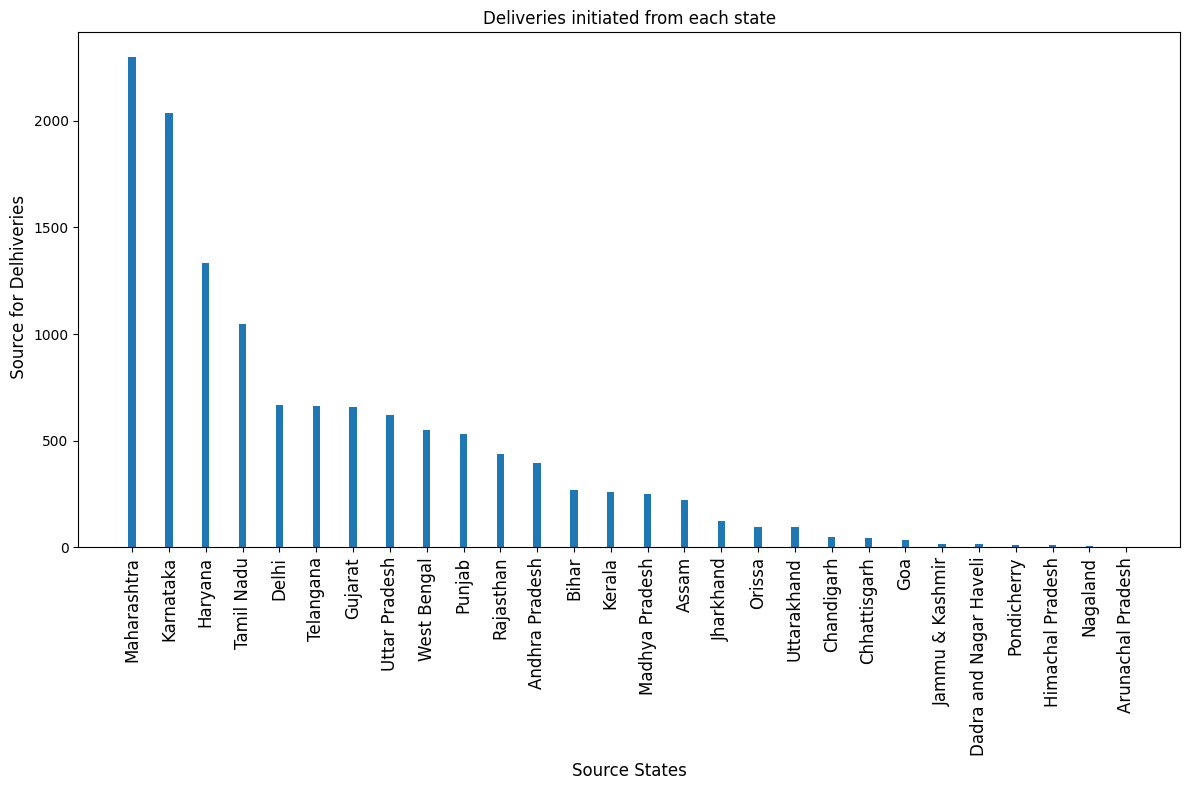

In [51]:
#VIsualising Chart for Deliveries initiated from each state
plt.figure(figsize=(12,8))
x_bar=Src_State.index
y_bar=Src_State
plt.bar(x_bar,y_bar,width=0.2)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("Source States",fontsize=12)
plt.ylabel(" Source for Delhiveries",fontsize=12)
plt.title("Deliveries initiated from each state")
plt.tight_layout()
plt.show()

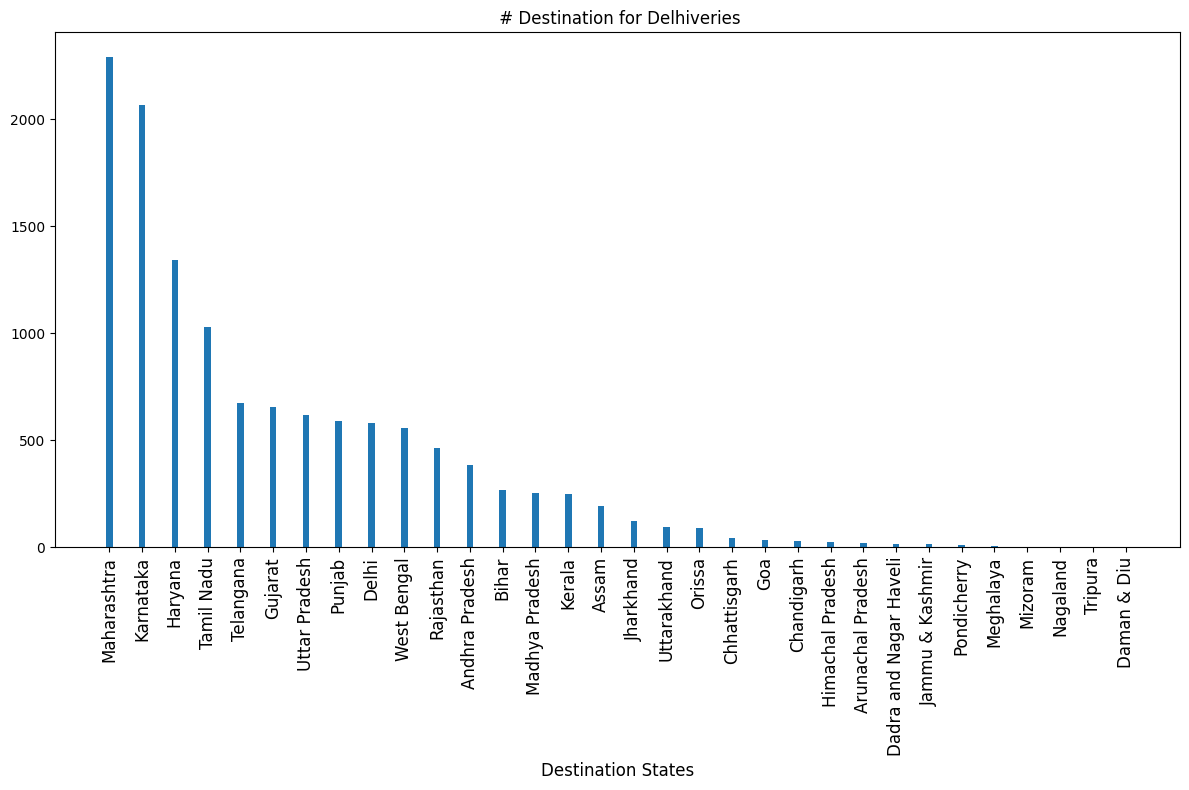

In [52]:
#VIsualising Chart for Deliveries done for each state
plt.figure(figsize=(12,8))
x_bar=Des_state.index
y_bar=Des_state
plt.bar(x_bar,y_bar,width=0.2)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("Destination States",fontsize=12)
plt.title(" # Destination for Delhiveries",fontsize=12)
plt.tight_layout()
plt.show()

Most of the Co Business is Interstate with Maharashtra, Karnataka as Top State

In [53]:
#understanding State to State Orders
order_counts = trip_df.groupby(['source_state', 'destination_state']).size().reset_index(name='Count')
order_counts.sort_values('Count', ascending=False)

,source_state,destination_state,Count
58,Maharashtra,Maharashtra,2271
42,Karnataka,Karnataka,1980
79,Tamil Nadu,Tamil Nadu,1011
29,Haryana,Haryana,786
83,Telangana,Telangana,631
...,...,...,...
23,Gujarat,Daman & Diu,1
75,Rajasthan,Uttar Pradesh,1
9,Assam,Nagaland,1
76,Tamil Nadu,Andhra Pradesh,1


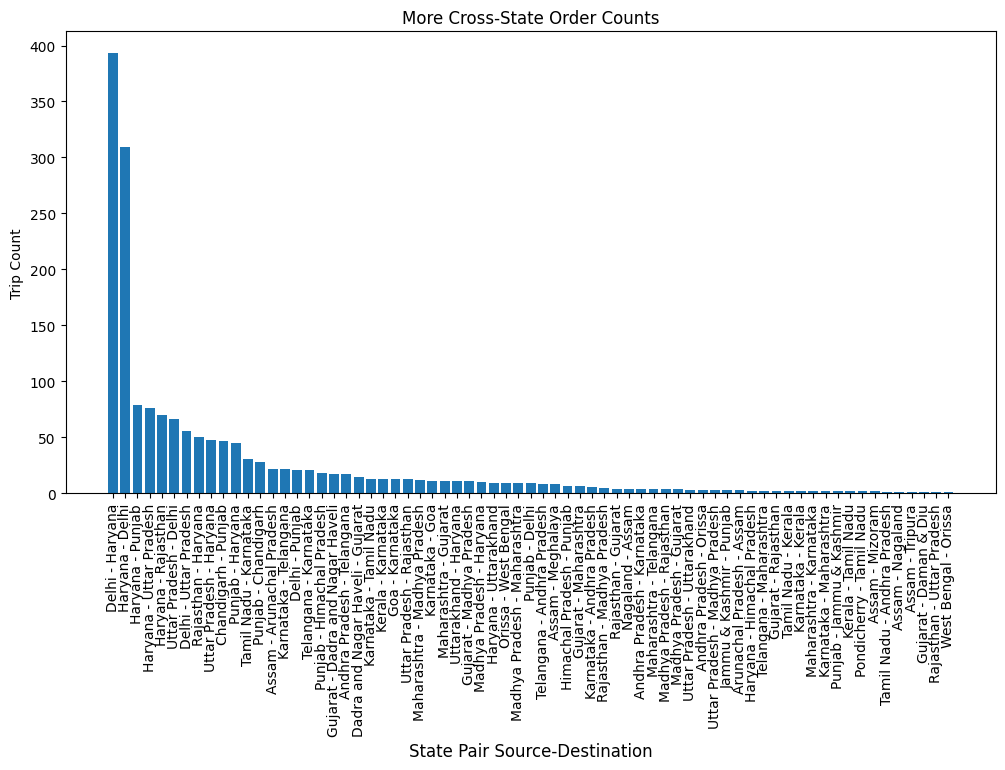

In [54]:
# understanding only cross-state orders
cross_state_orders = trip_df[trip_df['source_state'] != trip_df['destination_state']]

# Group the data by Src_State and Des_State and count the number of orders
cross_state_order_counts = cross_state_orders.groupby(['source_state', 'destination_state']).size().reset_index(name='Order Count')

#ordering maximum
cross_state_order_counts = cross_state_order_counts.sort_values(by='Order Count',ascending=False)
#cross_state_order_counts =cross_state_order_counts.head(20)
# Plot the cross-state order counts
plt.figure(figsize=(12, 6))
plt.bar(cross_state_order_counts['source_state'] + ' - ' + cross_state_order_counts['destination_state'], cross_state_order_counts['Order Count'])
plt.xlabel('State Pair Source-Destination',fontsize=12)
plt.ylabel('Trip Count')
plt.title('More Cross-State Order Counts')
plt.xticks(rotation=90)
plt.show()

In [55]:
less_crossborder = cross_state_order_counts[cross_state_order_counts['Order Count']<25]

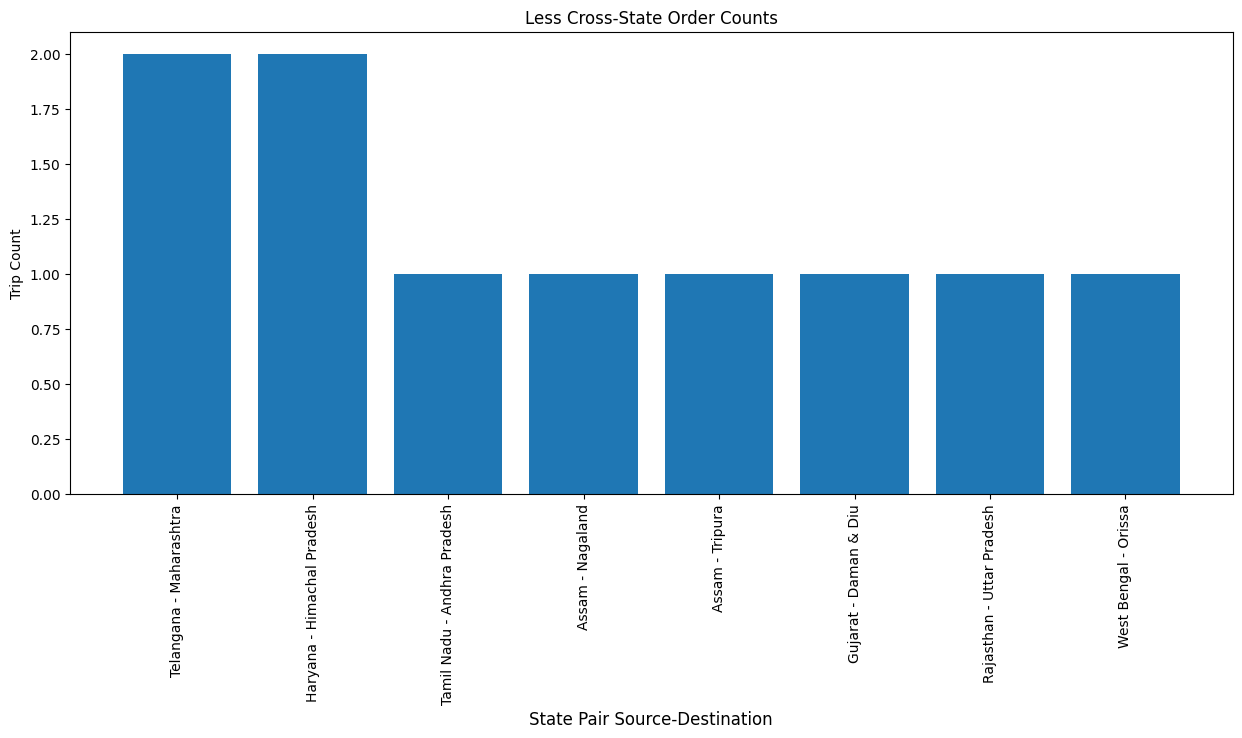

In [56]:
less_crossborder=less_crossborder.sort_values(by='Order Count',ascending=False)
less_crossborder =less_crossborder.tail(8)
plt.figure(figsize=(15, 6))
plt.bar(less_crossborder['source_state'] + ' - ' + less_crossborder['destination_state'], less_crossborder['Order Count'])
plt.xlabel('State Pair Source-Destination',fontsize=12)
plt.ylabel('Trip Count')
plt.title('Less Cross-State Order Counts')
plt.xticks(rotation=90)
plt.show()

Karnataka, Maharashtra TamilNadu Andhra Pradesh has less cross border Transctions, when they have good no. of interstate Business.

In [57]:
more_crossborder = cross_state_order_counts[cross_state_order_counts['Order Count']>35]

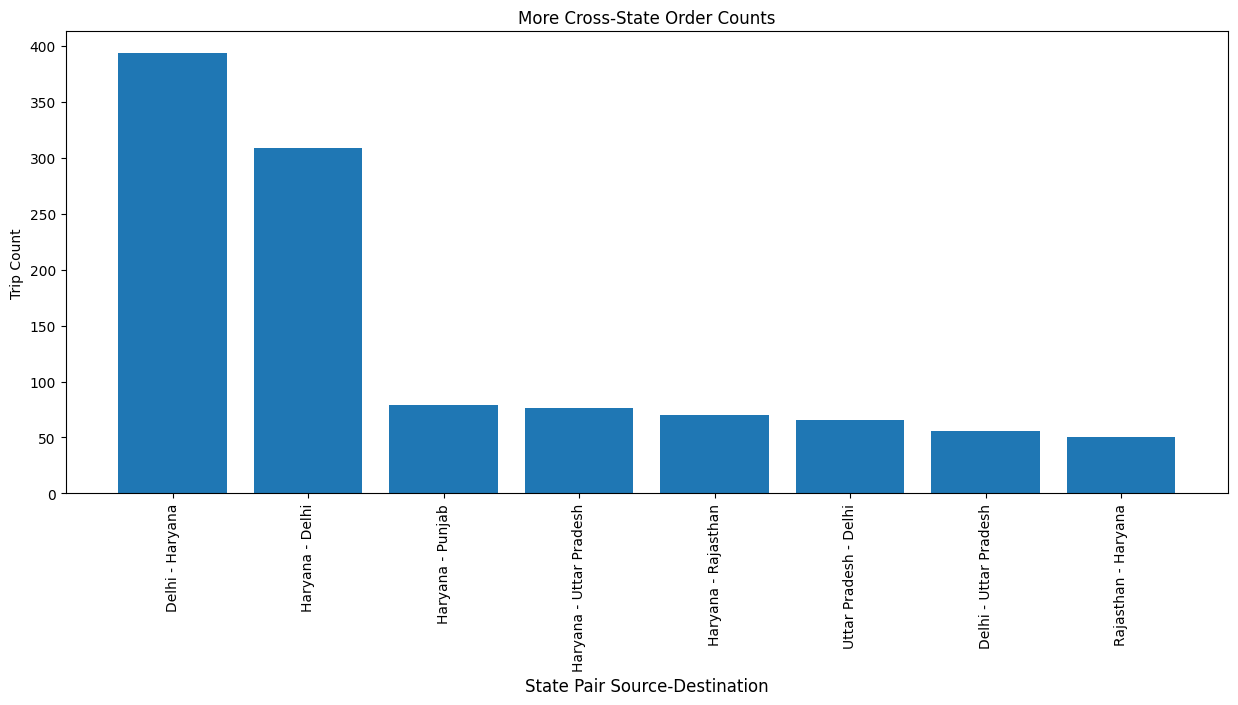

In [58]:
more_crossborder=more_crossborder.sort_values(by='Order Count',ascending=False)
more_crossborder =more_crossborder.head(8)
plt.figure(figsize=(15, 6))
plt.bar(more_crossborder['source_state'] + ' - ' + more_crossborder['destination_state'], more_crossborder['Order Count'])
plt.xlabel('State Pair Source-Destination',fontsize=12)
plt.ylabel('Trip Count')
plt.title('More Cross-State Order Counts')
plt.xticks(rotation=90)
plt.show()

Delhi Haryana Uttarpradesh which is also HQ Region of Company has most Cross Border Transactions.

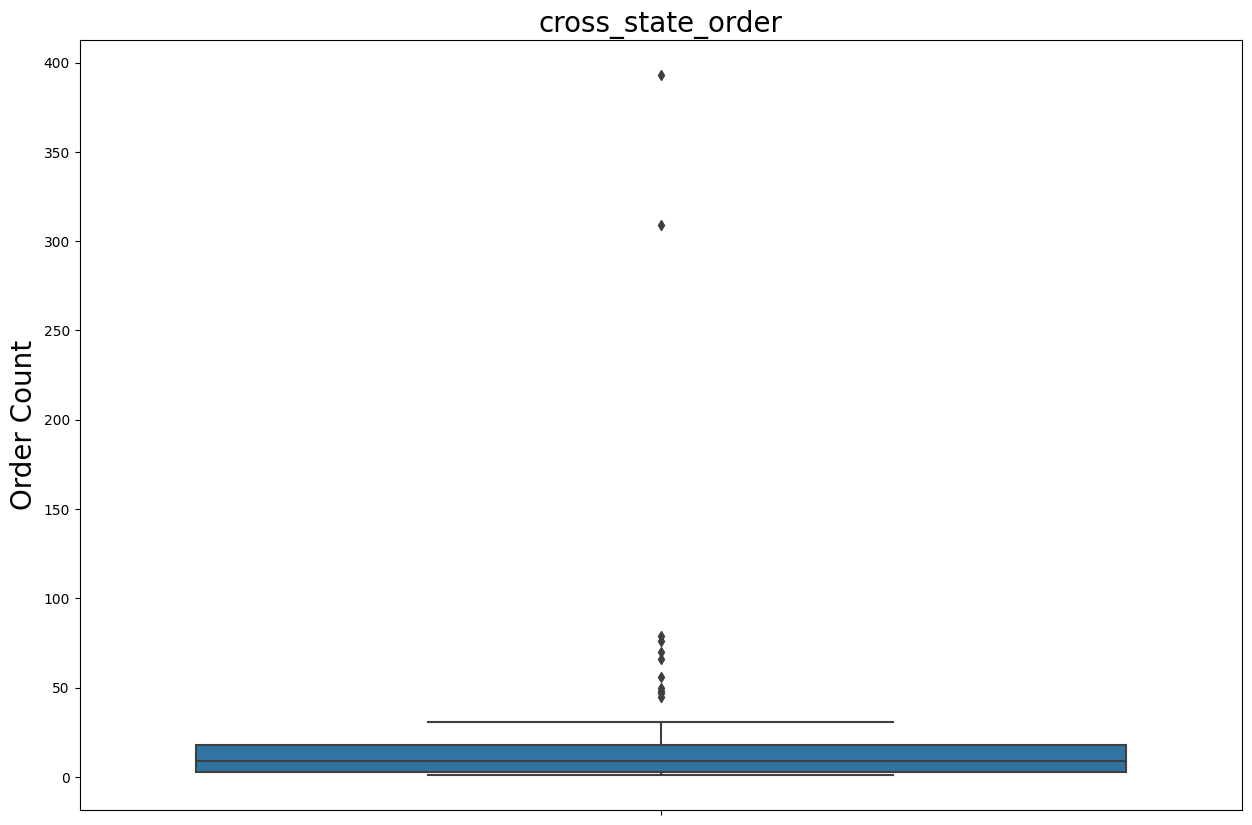

In [59]:
plt.figure(figsize=(15,10))
sns.boxplot(y = cross_state_order_counts['Order Count'])
data=cross_state_order_counts['Order Count']
IQR = np.percentile(data, 75)-np.percentile(data, 25)
#plt.yticks([np.min(data), np.percentile(data, 25), np.median(data), np.percentile(data, 75),np.percentile(data, 75)+1.5*IQR, np.max(data)])
#labels = ['Min','25th Quartile', 'Median', '75th Quartile',  'Max']

plt.ylabel('Order Count', fontsize=20)
plt.title('cross_state_order', fontsize=20)
plt.show()

In [60]:
corridor_order_counts = trip_df.groupby(['source_city', 'destination_city']).size().reset_index(name='Count')
corridor_order_counts = corridor_order_counts.sort_values('Count', ascending=False)

# Calculate the average distance and time between the busiest corridors
busiest_corridors = corridor_order_counts.head(5)
busiest_corridors

,source_city,destination_city,Count
184,Bengaluru,Bengaluru,549
135,Bangalore,Bengaluru,455
624,Hyderabad,Hyderabad,379
229,Bhiwandi,Mumbai,331
183,Bengaluru,Bangalore,326


In [61]:
cities = ['Bangalore', 'Bengaluru']

filtered_corridors = busiest_corridors.loc[(busiest_corridors['source_city'].isin(cities)) | (busiest_corridors['destination_city'].isin(cities))]
filtered_corridors

,source_city,destination_city,Count
184,Bengaluru,Bengaluru,549
135,Bangalore,Bengaluru,455
183,Bengaluru,Bangalore,326


In [62]:

avg_distance = trip_df[trip_df['source_city'].isin(filtered_corridors['source_city']) & trip_df['destination_city'].isin(filtered_corridors['destination_city'])]['actual_distance_to_destination'].mean()
avg_time = trip_df[trip_df['source_city'].isin(filtered_corridors['source_city']) & trip_df['destination_city'].isin(filtered_corridors['destination_city'])]['actual_time'].mean()
print('Average distance between the busiest corridors:', round(avg_distance,2),'kms')
print('Average time taken between the busiest corridors:', round(avg_time,2),'mins')

Average distance between the busiest corridors: 32.18 kms
Average time taken between the busiest corridors: 91.84 mins


In [63]:
center_counts = trip_df.groupby(['destination_state'])[['source_center', 'destination_center']].apply(lambda x: x.value_counts().sum()).reset_index(name='Count')
center_counts=center_counts.sort_values('Count', ascending=False)

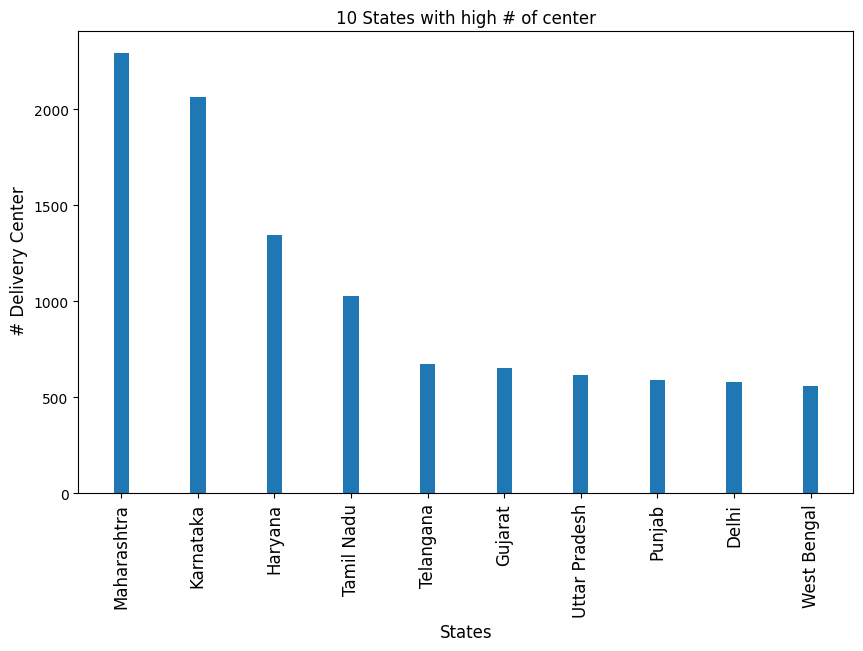

In [64]:

high_state_center =center_counts.head(10)
high_state_center
plt.figure(figsize=(10, 6))
x_bar=high_state_center.destination_state
y_bar=high_state_center.Count
plt.bar(x_bar,y_bar,width=0.2)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("States",fontsize=12)
plt.ylabel(" # Delivery Center",fontsize=12)
plt.title("10 States with high # of center")
plt.show()

In [65]:
low_state_center =center_counts.tail(10)
low_state_center

,destination_state,Count
12,Himachal Pradesh,25
1,Arunachal Pradesh,22
6,Dadra and Nagar Haveli,17
13,Jammu & Kashmir,15
23,Pondicherry,10
19,Meghalaya,8
20,Mizoram,2
21,Nagaland,1
7,Daman & Diu,1
28,Tripura,1


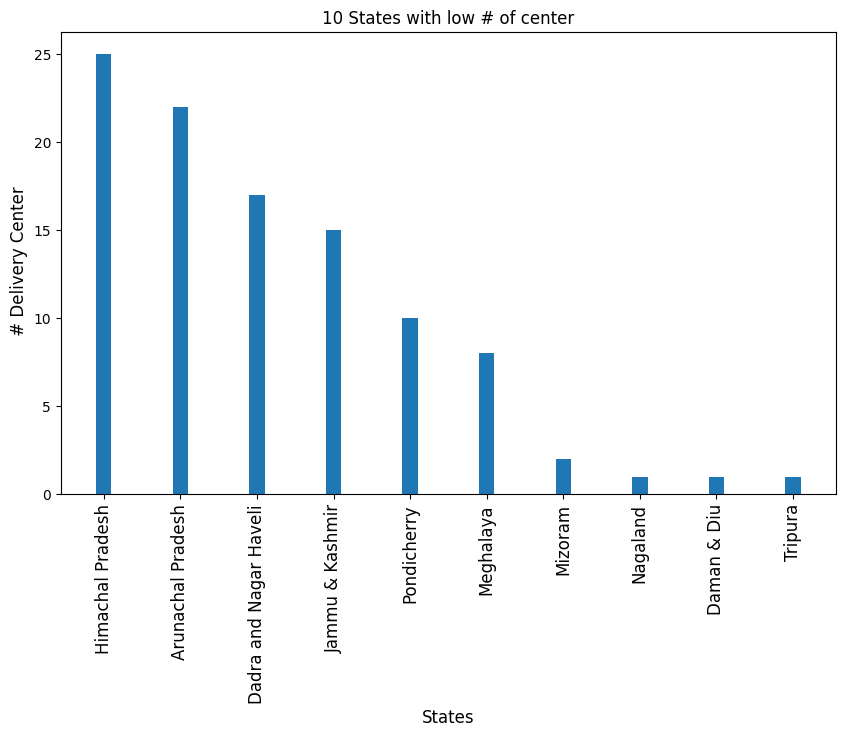

In [66]:
plt.figure(figsize=(10, 6))
x_bar=low_state_center.destination_state
y_bar=low_state_center.Count
plt.bar(x_bar,y_bar,width=0.2)
plt.xticks(rotation=90,fontsize=12)
plt.xlabel("States",fontsize=12)
plt.ylabel(" # Delivery Center",fontsize=12)
plt.title("10 States with low # of center")
plt.show()

In [67]:
states = ["Karnataka", "Maharashtra", "Tamil Nadu", "Gujarat", "Delhi", "Haryana", "Telangana", "Rajasthan", "Uttar Pradesh", "Assam", "Madhya Pradesh", "West Bengal", "Andhra Pradesh", "Punjab", "Kerala", "Bihar"]


palette = sns.color_palette("RdYlBu", len(states))
state_colors = {}
for i, state in enumerate(states):
    state_colors[state] = palette[i]

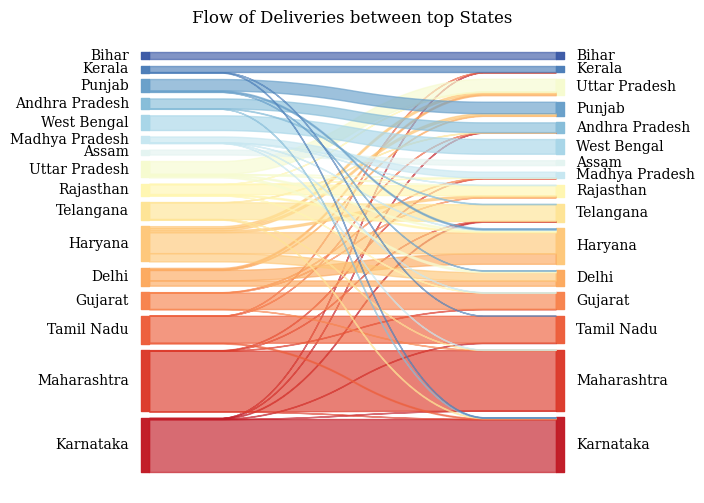

In [68]:
from pySankey.sankey import sankey
flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))][['source_state','destination_state']]
sankey(flow.source_state, flow.destination_state, aspect=20, colorDict=state_colors, fontsize=10)
plt.title('Flow of Deliveries between top States')
plt.show()

Most of the Company Business is Interstate with Maharashtra, Karnataka as Top State

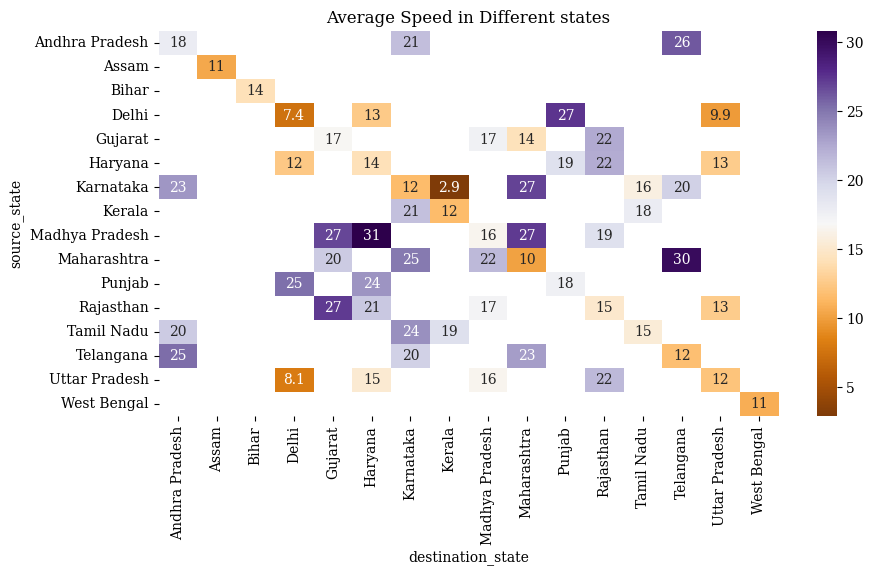

In [69]:
#Average trip time by source and destination state
flow = trip_df[(trip_df["source_state"].isin(state_colors.keys())) & (trip_df["destination_state"].isin(state_colors.keys()))][['source_state','destination_state','DeliveryTime','actual_distance_to_destination']]
flow['speed'] = flow['actual_distance_to_destination']/(flow['DeliveryTime']/60)
data = pd.pivot_table(data=flow, index='source_state', columns='destination_state', values='speed', aggfunc='mean')
plt.figure(figsize=(10,5))
sns.heatmap(data,cmap= "PuOr", annot=True)
plt.title('Average Speed in Different states')

plt.show()

Delhi has slowest speed.
Inter-State speed is faster than Intra-state speed. Kerala karnataka corridoor has low spped

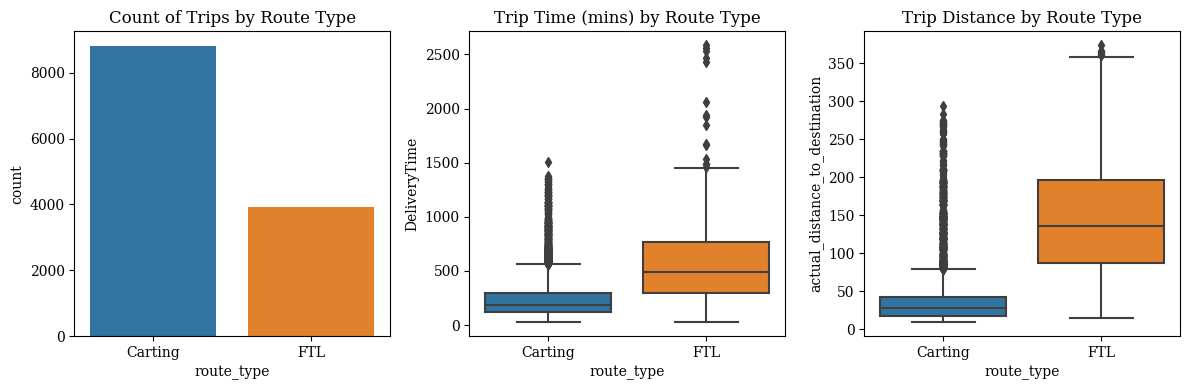

In [70]:
#time and distance by route_type

fig, ax = plt.subplots(1,3,figsize=(12,4))

sns.countplot(x=trip_df['route_type'], ax=ax[0])
sns.boxplot(data=trip_df, x='route_type', y='DeliveryTime', ax=ax[1])
sns.boxplot(data=trip_df, x='route_type', y='actual_distance_to_destination', ax=ax[2])


ax[0].set_title('Count of Trips by Route Type')
ax[1].set_title('Trip Time (mins) by Route Type')
ax[2].set_title('Trip Distance by Route Type')


plt.tight_layout()
plt.show()

Carting/ Full Truck Load Ratio is nearly 2. 
Carting is used for short duration trips whereas FTL are used for long duration trips. 

 1. Hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value

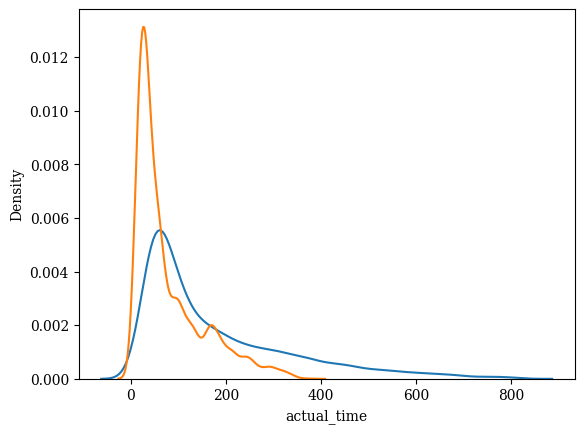

In [71]:
sns.kdeplot(trip_df.actual_time, label='actual_time')
sns.kdeplot(trip_df.osrm_time,label='osrm_time')
plt.show()

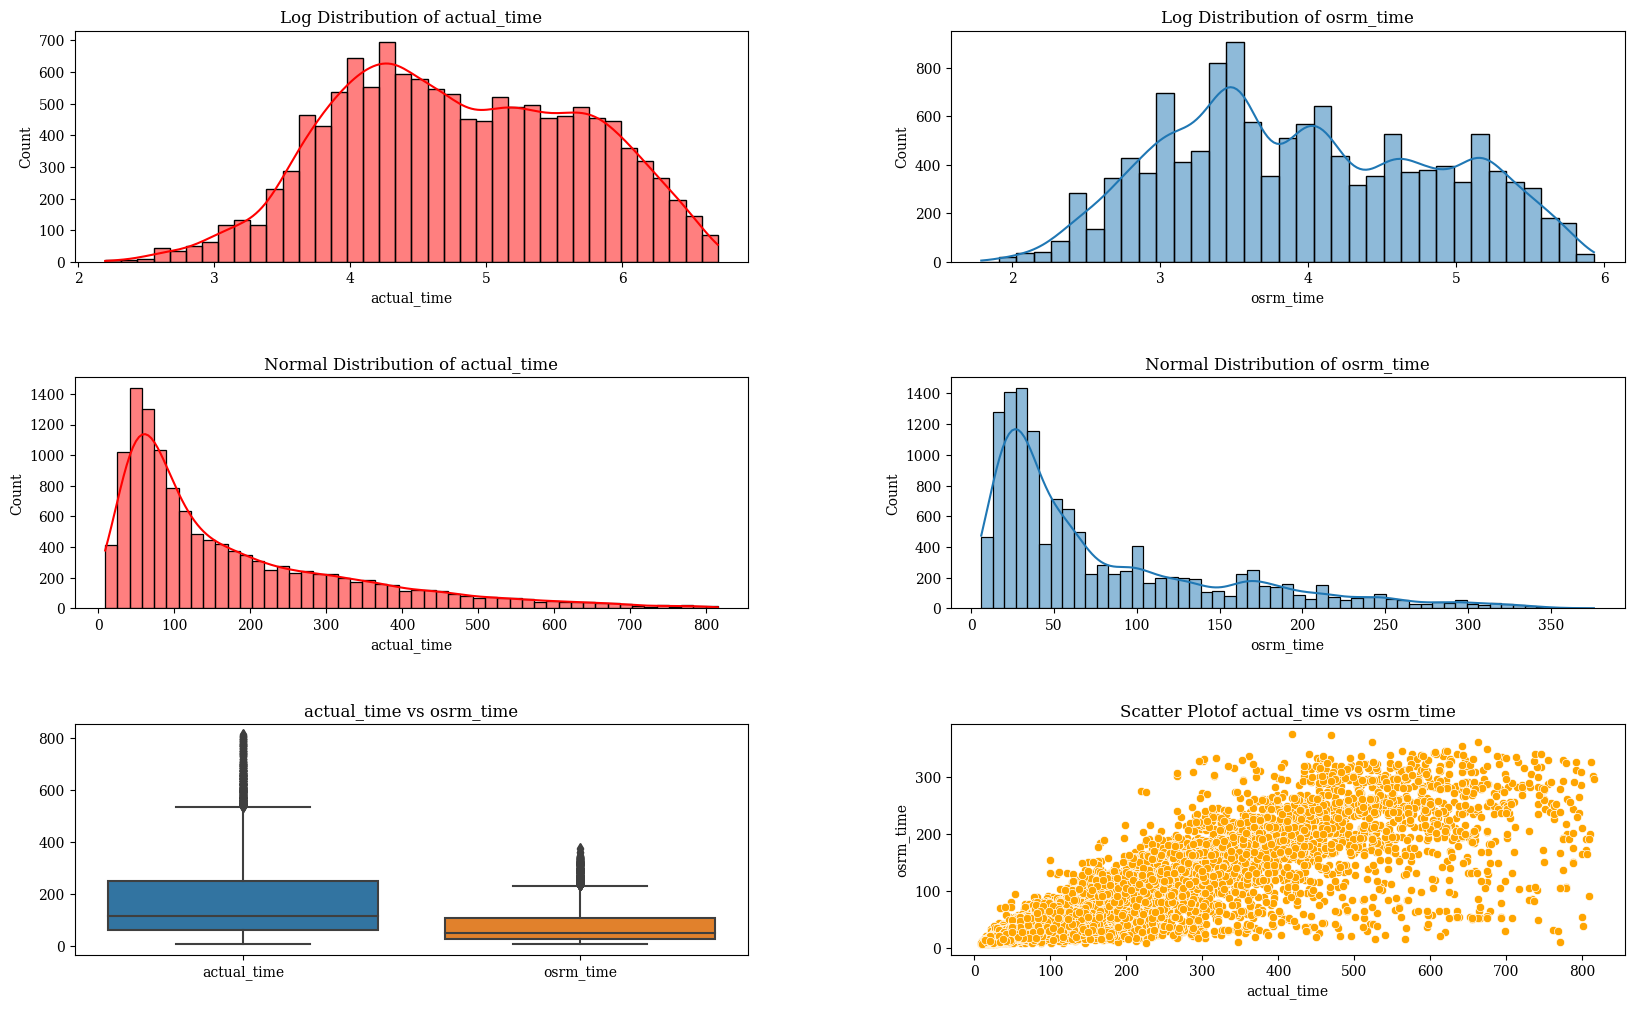

In [72]:
# Distribution of acutal time and osrm time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

sns.histplot(np.log(trip_df['actual_time']),color='red',kde=True,ax=axs[0,0])
axs[0,0].set_title('Log Distribution of actual_time')

sns.histplot(np.log(trip_df['osrm_time']),kde=True,ax=axs[0,1])
axs[0,1].set_title('Log Distribution of osrm_time')

sns.histplot(trip_df['actual_time'],color='red',kde=True,ax=axs[1,0])
axs[1,0].set_title('Normal Distribution of actual_time')

sns.histplot(trip_df['osrm_time'],kde=True,ax=axs[1,1])
axs[1,1].set_title('Normal Distribution of osrm_time')

sns.boxplot(data=trip_df[['actual_time', 'osrm_time']],ax=axs[2,0])
axs[2,0].set_title('actual_time vs osrm_time')

sns.scatterplot(x=trip_df['actual_time'],y=trip_df['osrm_time'],color='orange', ax=axs[2, 1])
axs[2,1].set_title('Scatter Plotof actual_time vs osrm_time')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()

Both actual_time and osrm_time is rightly skewed.Actual Time Higher than OSRM Time.

In [73]:
from scipy.stats import norm, ttest_1samp,t,ttest_ind,zscore
from scipy import stats
actual_time = trip_df['actual_time']
osrm_time = trip_df['osrm_time']

In [74]:
print('Variance of Actual Time:',trip_df.actual_time.var())
print('Variance of OSRM Time', trip_df.osrm_time.var())

Variance of Actual Time: 25011.68843838498
Variance of OSRM Time 5232.160463104604


High Variance takng log

Null hypothesis (H0): aggregated values of actual_time not higher than OSRM time.
Alternative hypothesis (Ha): aggregated values of actual_time higher than OSRM time.

In [75]:
# Perform an independent samples t-test
t_stat, p_value = stats.ttest_ind(np.log(actual_time), np.log(osrm_time),alternative='greater')

print('Test Statistic:', t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: \n actual_time is higher than osrm_time")
else:
    print("Fail to reject the null hypothesis: \n actual_time not higher than osrm_time.")


Test Statistic: 74.07939353363732
p-value: 0.0
Reject the null hypothesis: 
 actual_time is higher than osrm_time


In [76]:
rho, _ = stats.spearmanr(actual_time, osrm_time)

# Interpret the result
if rho > 0:
    print(f"Spearman's rho is {rho:.2f}, \n indicating increase in actual_time with increase in osrm time.")
elif rho < 0:
    print(f"Spearman's rho is {rho:.2f}, \n indicating decrease in actual_time with increase in osrm time.")
else:
    print(f"Spearman's rho is {rho:.2f}, \n indicating no correlation betwenn actual time and osrm time")

Spearman's rho is 0.87, 
 indicating increase in actual_time with increase in osrm time.


2. Hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value

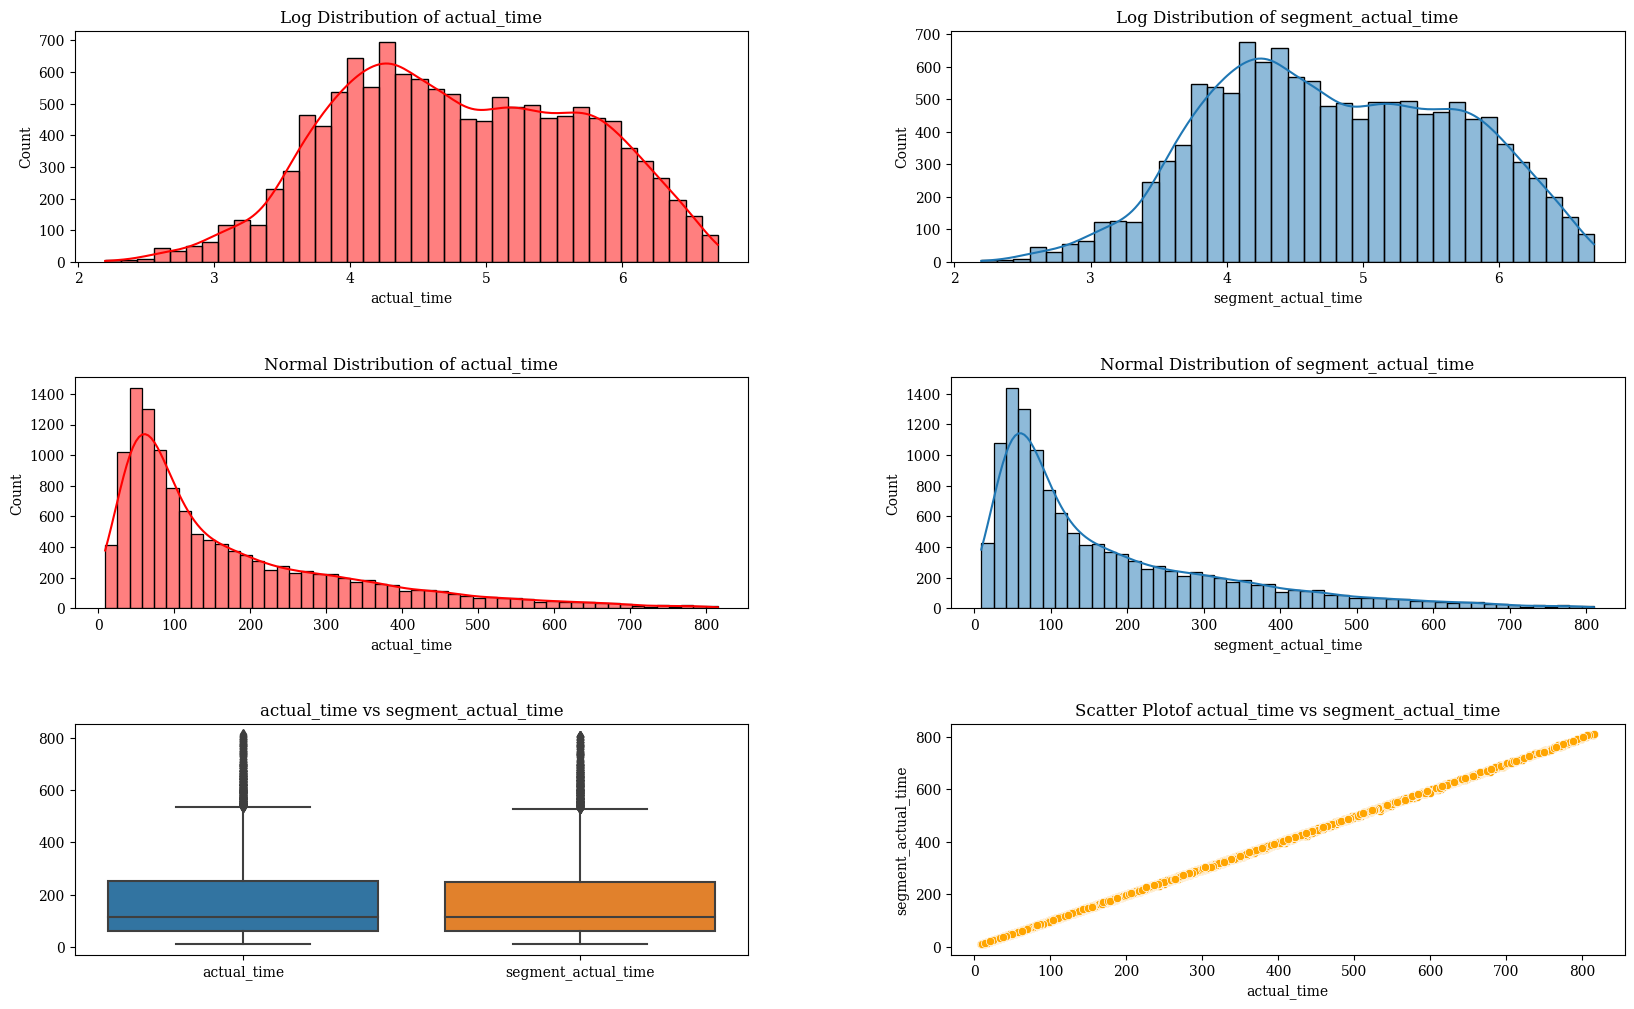

In [77]:
# Distribution of acutal time and segment actual time
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

sns.histplot(np.log(trip_df['actual_time']),color='red',kde=True,ax=axs[0,0])
axs[0,0].set_title('Log Distribution of actual_time')

sns.histplot(np.log(trip_df['segment_actual_time']),kde=True,ax=axs[0,1])
axs[0,1].set_title('Log Distribution of segment_actual_time')

sns.histplot(trip_df['actual_time'],color='red',kde=True,ax=axs[1,0])
axs[1,0].set_title('Normal Distribution of actual_time')

sns.histplot(trip_df['segment_actual_time'],kde=True,ax=axs[1,1])
axs[1,1].set_title('Normal Distribution of segment_actual_time')

sns.boxplot(data=trip_df[['actual_time', 'segment_actual_time']],ax=axs[2,0])
axs[2,0].set_title('actual_time vs segment_actual_time')

sns.scatterplot(x=trip_df['actual_time'],y=trip_df['segment_actual_time'],color='orange', ax=axs[2, 1])
axs[2,1].set_title('Scatter Plotof actual_time vs segment_actual_time')

plt.subplots_adjust(wspace=0.3, hspace=0.5)
# Show the plot
plt.show()

Right Skewed Distributions, Linear Scatter plot

In [78]:
actual_time = trip_df['actual_time']
segment_actual_time = trip_df['segment_actual_time']

print(round(actual_time.mean(),2),round(segment_actual_time.mean(),2))

177.45 175.8


In [79]:
print('Variance of Actual Time:',trip_df.actual_time.var())
print('Variance of Segment Actual Time', trip_df.segment_actual_time.var())

Variance of Actual Time: 25011.68843838498
Variance of Segment Actual Time 24680.33767830605


Small difference in mean and variance values 

Null hypothesis (H0): There is no significant difference between the aggregated values of actual_time and segment_actual time.
Alternative hypothesis (Ha): There is a significant difference between the aggregated values of actual_time and segment_actual time.

In [80]:
# Since Means are near, so t_test Independent
t_stat, p_value = ttest_ind(actual_time, segment_actual_time, alternative='two-sided')

print('Test Statistic:', t_stat)
print("p-value:", p_value)


if p_value < 0.05:
    print("Reject the null hypothesis: \n There is a significant difference between actual_time and segment_actual_time.")
else:
    print("Fail to reject the null hypothesis: \n There is not enough evidence to conclude a significant difference between actual_time and segment_actual_time.")

Test Statistic: 0.8381648951065266
p-value: 0.40194597338420224
Fail to reject the null hypothesis: 
 There is not enough evidence to conclude a significant difference between actual_time and segment_actual_time.


3. Hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value

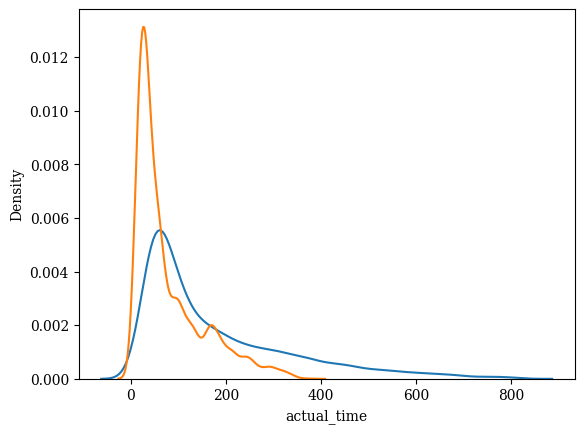

In [81]:
sns.kdeplot(trip_df.actual_time, label='osrm_distance')
sns.kdeplot(trip_df.osrm_time,label='osrm_distance')
plt.show()

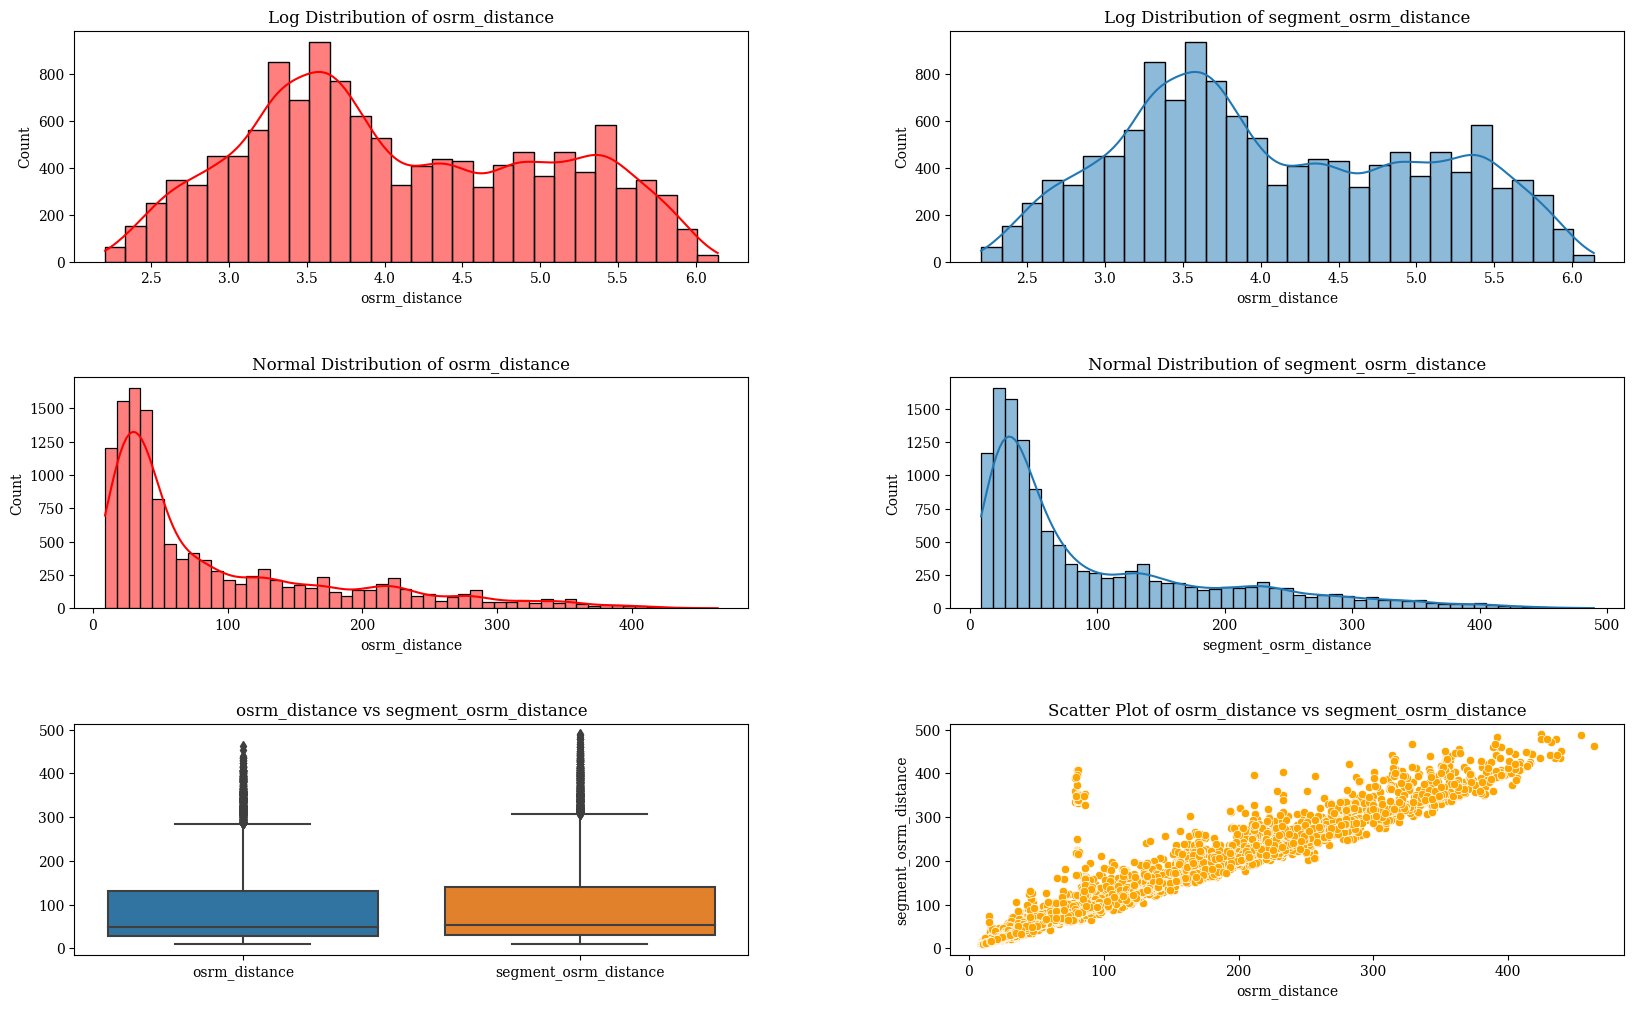

In [82]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

sns.histplot(np.log(trip_df['osrm_distance']),color='red',kde=True,ax=axs[0,0])
axs[0,0].set_title('Log Distribution of osrm_distance')

sns.histplot(np.log(trip_df['osrm_distance']),kde=True,ax=axs[0,1])
axs[0,1].set_title('Log Distribution of segment_osrm_distance')

sns.histplot(trip_df['osrm_distance'],color='red',kde=True,ax=axs[1,0])
axs[1,0].set_title('Normal Distribution of osrm_distance')

sns.histplot(trip_df['segment_osrm_distance'],kde=True,ax=axs[1,1])
axs[1,1].set_title('Normal Distribution of segment_osrm_distance')

sns.boxplot(data=trip_df[['osrm_distance', 'segment_osrm_distance']],ax=axs[2,0])
axs[2,0].set_title('osrm_distance vs segment_osrm_distance')

sns.scatterplot(x=trip_df['osrm_distance'],y=trip_df['segment_osrm_distance'],color='orange', ax=axs[2, 1])
axs[2,1].set_title('Scatter Plot of osrm_distance vs segment_osrm_distance')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

Right Skewed Distributions, Nearly Linear Scatter plot wuth some outliers

In [83]:
osrm_distance = trip_df['osrm_distance']
segment_osrm_distance = trip_df['segment_osrm_distance']
print(round(osrm_distance.mean(),2),round(segment_osrm_distance.mean(),2))


91.73 97.97


In [84]:
print('Variance of osrm_distance:',trip_df.osrm_distance.var())
print('Variance of segment_osrm_distance', trip_df.segment_osrm_distance.var())

Variance of osrm_distance: 8022.17075259498
Variance of segment_osrm_distance 8990.650901805398


nearly Same Mean values and  variances, So Independent T test

Null hypothesis (H0): aggregated values of osrm_distance not lesser than segment_osrm_distance.. 
Alternative hypothesis (Ha): aggregated values of osrm_distance lesser than segment_osrm_distance.

In [85]:

t_stat, p_value = ttest_ind(osrm_distance, segment_osrm_distance, equal_var=False, alternative='less')

print('Test Statistic:', t_stat)

print('p-value:', p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: \n osrm_distance lesser than segment_osrm_distance")
else:
    print("Fail to reject the null hypothesis: \n osrm_distance not lesser than segment_osrm_distance.")


Test Statistic: -5.394101351961479
p-value: 3.47416501159506e-08
Reject the null hypothesis: 
 osrm_distance lesser than segment_osrm_distance


4. Hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value

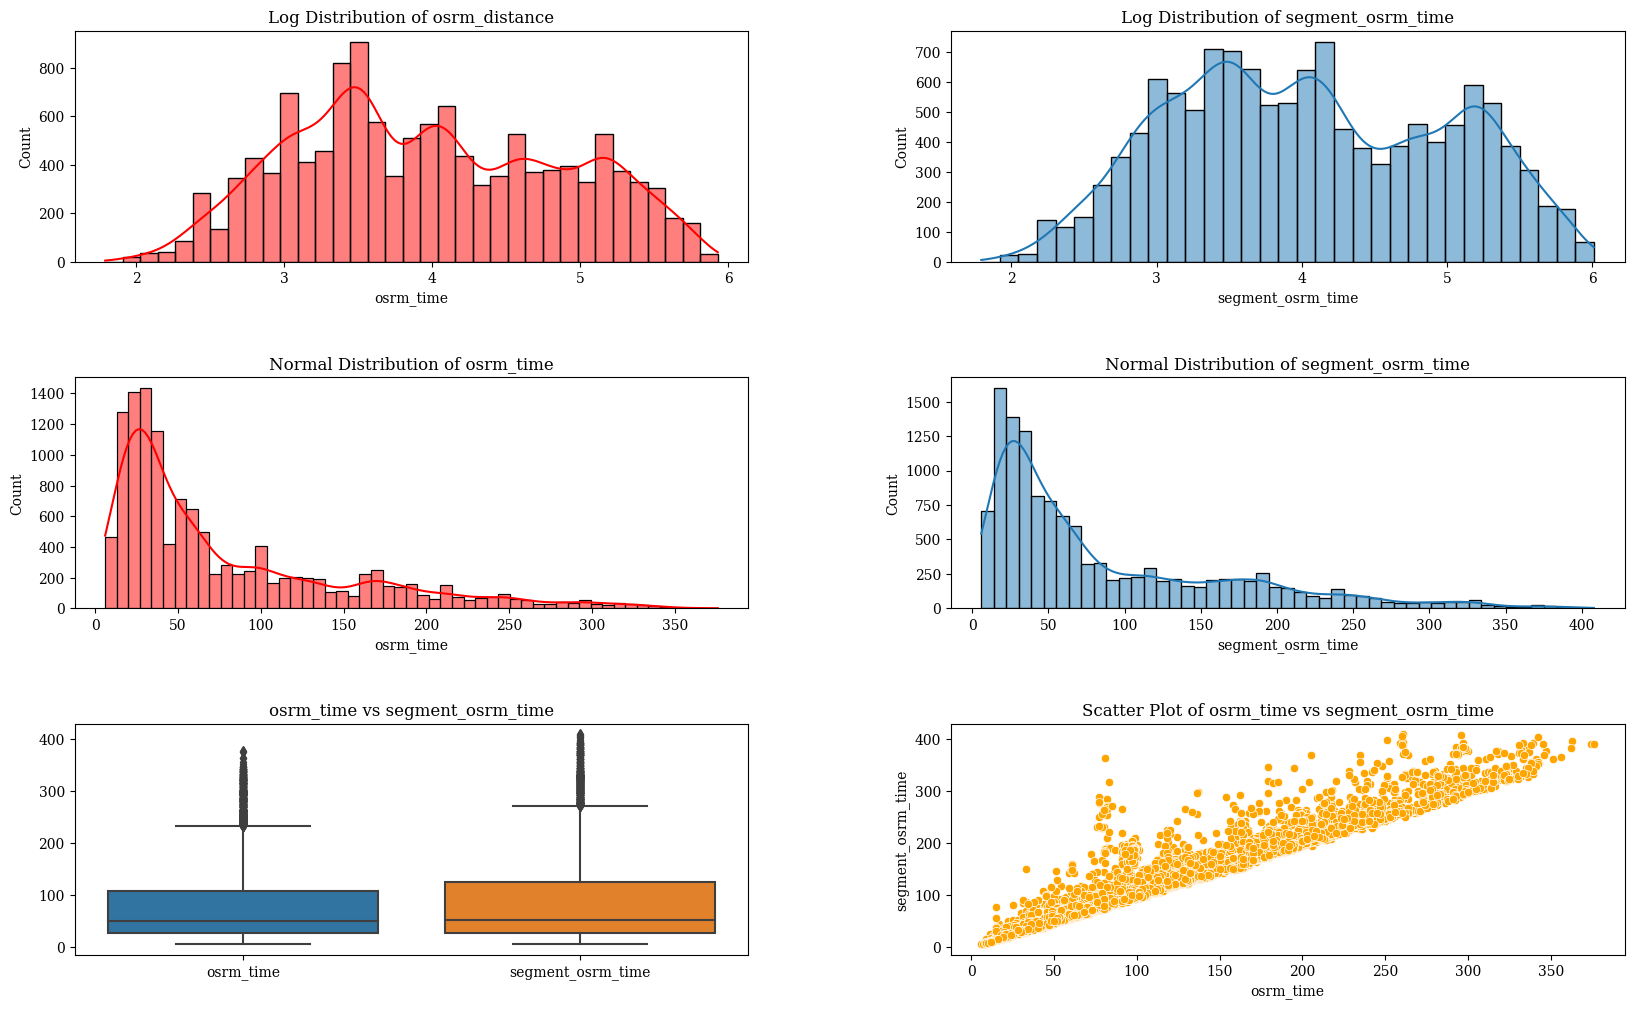

In [86]:

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

sns.histplot(np.log(trip_df['osrm_time']),color='red',kde=True,ax=axs[0,0])
axs[0,0].set_title('Log Distribution of osrm_distance')

sns.histplot(np.log(trip_df['segment_osrm_time']),kde=True,ax=axs[0,1])
axs[0,1].set_title('Log Distribution of segment_osrm_time')

sns.histplot(trip_df['osrm_time'],color='red',kde=True,ax=axs[1,0])
axs[1,0].set_title('Normal Distribution of osrm_time')

sns.histplot(trip_df['segment_osrm_time'],kde=True,ax=axs[1,1])
axs[1,1].set_title('Normal Distribution of segment_osrm_time')

sns.boxplot(data=trip_df[['osrm_time', 'segment_osrm_time']],ax=axs[2,0])
axs[2,0].set_title('osrm_time vs segment_osrm_time')

sns.scatterplot(x=trip_df['osrm_time'],y=trip_df['segment_osrm_time'],color='orange', ax=axs[2, 1])
axs[2,1].set_title('Scatter Plot of osrm_time vs segment_osrm_time')

plt.subplots_adjust(wspace=0.3, hspace=0.5)

plt.show()

Right Skewed Distributions

In [87]:
osrm_time = trip_df['osrm_time']
segment_osrm_time = trip_df['segment_osrm_time']
print(round(osrm_time.mean(),2),round(segment_osrm_time.mean(),2))


78.44 85.91


In [88]:
print('Variance of OSRM Time:',trip_df.osrm_time.var())
print('Variance of Segment OSRM Time', trip_df.segment_osrm_time.var())

Variance of OSRM Time: 5232.160463104604
Variance of Segment OSRM Time 6336.952455735659


nearly Same Mean values and  variances, So Independent T test

Null hypothesis (H0): aggregated values of osrm_time not lesser than segment_osrm_time.. 
Alternative hypothesis (Ha): aggregated values of osrm_time lesser than segment_osrm_time.

In [89]:
t_stat, p_value = ttest_ind(osrm_time, segment_osrm_time, alternative='less')

print('Test Statistic:', t_stat)
print("p-value:", p_value)

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: aggregated values of osrm_time lesser than segment_osrm_time.")
else:
    print("Fail to reject the null hypothesis: aggregated values of osrm_time not lesser than segment_osrm_time.")

Test Statistic: -7.8316261870167665
p-value: 2.501509205018866e-15
Reject the null hypothesis: aggregated values of osrm_time lesser than segment_osrm_time.


one-hot encoding of categorical variables (like route_type)

In [90]:
trip_df.columns


Index(['index', 'trip_uuid', 'trip_creation_time', 'route_schedule_uuid',
       'route_type', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'Delivery_Count', 'Year',
       'Month', 'Day', 'Hour', 'Minute', 'DayOfWeek', 'DeliveryTime',
       'source_state', 'source_city', 'destination_state', 'destination_city'],
      dtype='object')

In [91]:
trip_df_copy = trip_df[['trip_uuid','route_schedule_uuid',
       'route_type','start_scan_to_end_scan', 'actual_distance_to_destination',
       'actual_time', 'osrm_time', 'osrm_distance','Delivery_Count','DayOfWeek', 'DeliveryTime',
       'source_state', 'source_city', 'destination_state', 'destination_city']]

In [92]:
trip_df_copy.describe(include="object")

,trip_uuid,route_schedule_uuid,route_type,source_state,source_city,destination_state,destination_city
count,12723,12723,12723,12723,12723,12723,12723
unique,12723,1360,2,28,652,32,748
top,trip-153671042288605164,thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...,Carting,Maharashtra,Bengaluru,Maharashtra,Bengaluru
freq,1,53,8812,2300,1004,2291,1056


In [93]:
trip_df_copy

,trip_uuid,route_schedule_uuid,route_type,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,Delivery_Count,DayOfWeek,DeliveryTime,source_state,source_city,destination_state,destination_city
0,trip-153671042288605164,thanos::sroute:3a1b0ab2-bb0b-4c53-8c59-eb2a2c0...,Carting,180.0,73.186911,143.0,68.0,85.1110,9,2,181.6,Karnataka,Tumkur,Karnataka,Chikblapur
1,trip-153671046011330457,thanos::sroute:f0176492-a679-4597-8332-bbd1c7f...,Carting,100.0,17.175274,59.0,15.0,19.6800,2,2,100.5,Maharashtra,Mumbai Hub,Maharashtra,Mumbai
2,trip-153671052974046625,thanos::sroute:d9f07b12-65e0-4f3b-bec8-df06134...,FTL,717.0,127.448500,341.0,117.0,146.7918,7,2,718.4,Karnataka,Bellary,Karnataka,Bellary
3,trip-153671055416136166,thanos::sroute:9bf03170-d0a2-4a3f-aa4d-9aaab3d...,Carting,189.0,24.597048,61.0,23.0,28.0647,3,2,190.5,Tamil Nadu,Chennai,Tamil Nadu,Chennai
4,trip-153671066201138152,thanos::sroute:a97698cc-846e-41a7-916b-88b1741...,Carting,98.0,9.100510,24.0,13.0,12.0184,1,2,98.0,Tamil Nadu,Chennai,Tamil Nadu,Chennai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12718,trip-153861095625827784,thanos::sroute:8a120994-f577-4491-9e4b-b7e4a14...,Carting,257.0,57.762332,83.0,62.0,73.4630,7,2,405.5,Punjab,Chandigarh,Punjab,Chandigarh
12719,trip-153861104386292051,thanos::sroute:b30e1ec3-3bfa-4bd2-a7fb-3b75769...,Carting,60.0,15.513784,21.0,12.0,16.0882,2,2,60.6,Haryana,FBD,Haryana,Faridabad
12720,trip-153861106442901555,thanos::sroute:5609c268-e436-4e0a-8180-3db4a74...,Carting,421.0,38.684839,282.0,48.0,58.9037,6,2,422.1,Uttar Pradesh,Kanpur,Uttar Pradesh,Kanpur
12721,trip-153861115439069069,thanos::sroute:c5f2ba2c-8486-4940-8af6-d1d2a6a...,Carting,347.0,134.723836,264.0,179.0,171.1103,17,2,348.5,Tamil Nadu,Tirunelveli,Tamil Nadu,Tirunelveli


In [94]:
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce

In [95]:
label_encoder=LabelEncoder()
col="route_type"
trip_df_copy[col]= label_encoder.fit_transform(trip_df_copy[col])

In [96]:
trip_df_copy[col]

0        0
1        0
2        1
3        0
4        0
        ..
12718    0
12719    0
12720    0
12721    0
12722    1
Name: route_type, Length: 12723, dtype: int32

In [97]:
trip_df_copy[col].value_counts()

route_type
0    8812
1    3911
Name: count, dtype: int64

In [98]:
from category_encoders import TargetEncoder
col="route_schedule_uuid"
target_encoder=TargetEncoder()
trip_df_copy[col]= target_encoder.fit_transform(trip_df_copy[col],trip_df_copy["route_type"])
trip_df_copy[col].value_counts()

route_schedule_uuid
0.161377    627
0.176581    595
0.184034    560
0.212095    540
0.191342    495
           ... 
0.047482     37
0.051637     36
0.056077     35
0.060808     34
0.101998     27
Name: count, Length: 62, dtype: int64

In [99]:
trip_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12723 entries, 0 to 12722
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   trip_uuid                       12723 non-null  object 
 1   route_schedule_uuid             12723 non-null  float64
 2   route_type                      12723 non-null  int32  
 3   start_scan_to_end_scan          12723 non-null  float64
 4   actual_distance_to_destination  12723 non-null  float64
 5   actual_time                     12723 non-null  float64
 6   osrm_time                       12723 non-null  float64
 7   osrm_distance                   12723 non-null  float64
 8   Delivery_Count                  12723 non-null  int64  
 9   DayOfWeek                       12723 non-null  int32  
 10  DeliveryTime                    12723 non-null  float64
 11  source_state                    12723 non-null  object 
 12  source_city                     

In [100]:
cat_cols=trip_df_copy.dtypes=="object"
cat_cols= list(cat_cols[cat_cols].index)
cat_cols

['trip_uuid',
 'source_state',
 'source_city',
 'destination_state',
 'destination_city']

In [101]:
target_encoder = ce.TargetEncoder()
trip_df_copy[cat_cols] = target_encoder.fit_transform(trip_df_copy[cat_cols], trip_df_copy['route_type'])


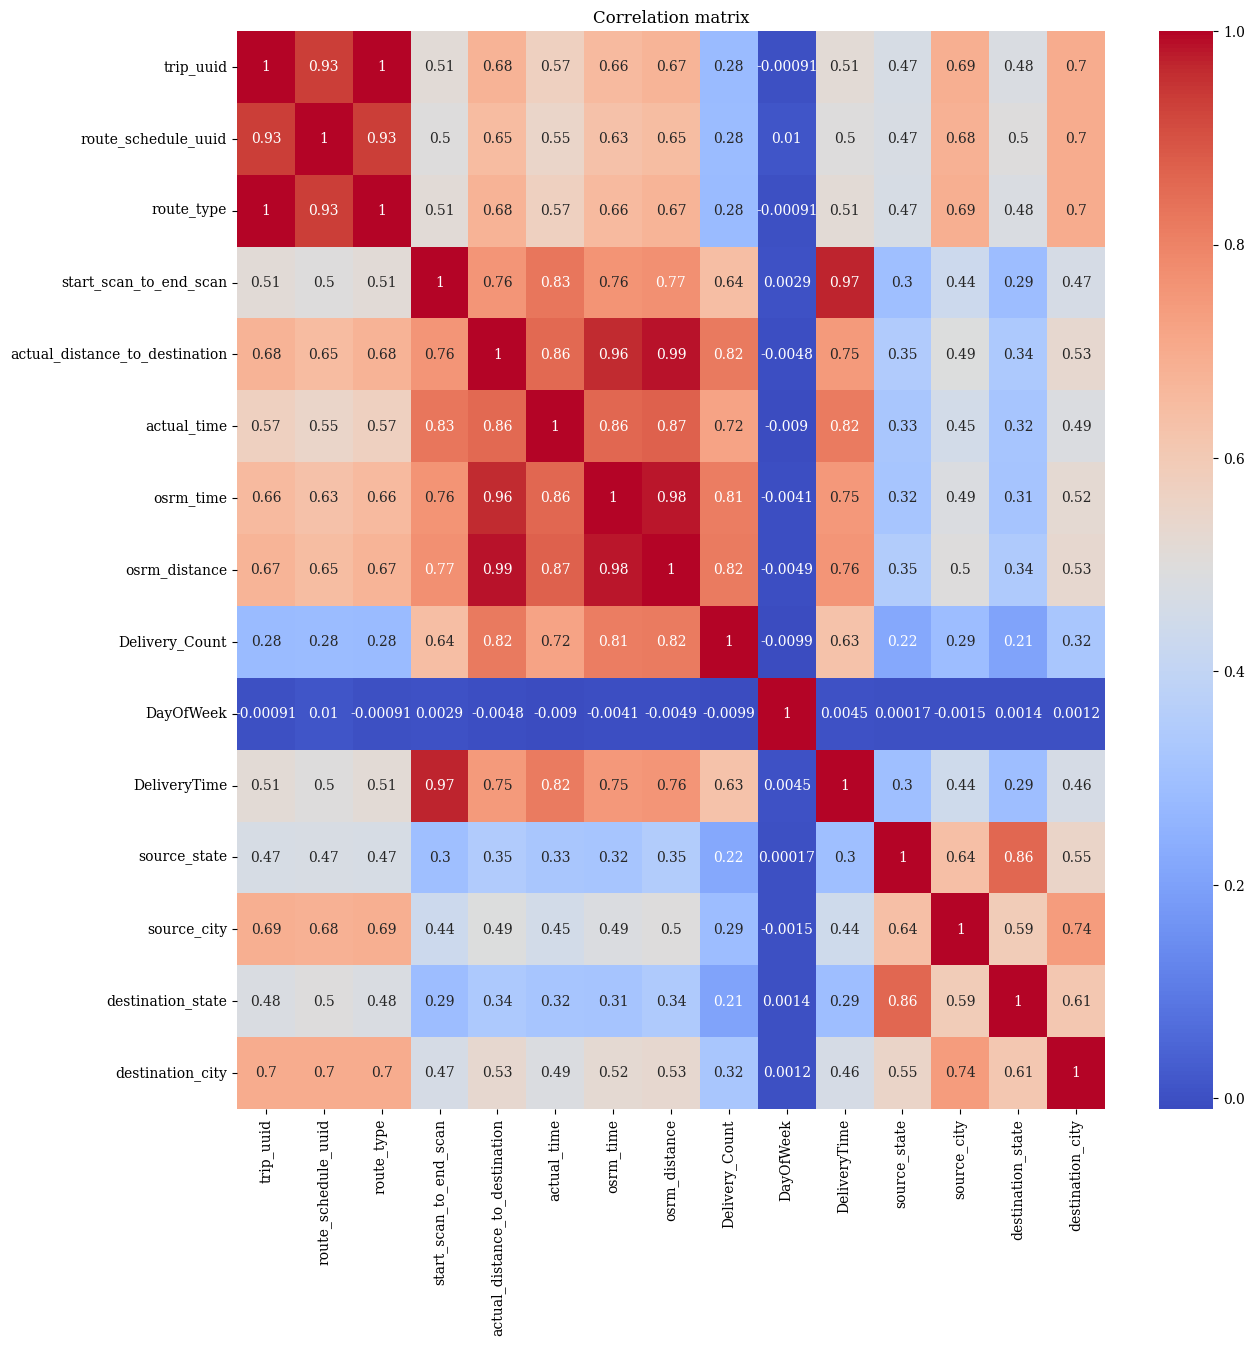

In [102]:
plt.figure(figsize=(14,14))
sns.heatmap(trip_df_copy.corr(method='pearson'),annot=True,cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

Our Feature Delivery Count has high correlation with actual_distance_to Destination and osrm distance.
Delivery Time also has high correlation with actual_distance_to Destination and osrm distance

 Standardize the numerical features using MinMaxScaler or StandardScaler.

In [103]:
num_vars

['start_scan_to_end_scan',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance']

In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
new_trip = trip_df.copy()
scaler = StandardScaler()
scaler.fit(new_trip[num_vars])
new_trip[num_vars] = scaler.transform(new_trip[num_vars])
new_trip[num_vars]

,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance
0,-0.548546,0.012060,-0.217856,-0.144341,-0.073948,-0.221500,-0.262662,-0.145358
1,-0.861602,-0.765152,-0.749015,-0.877085,-0.804506,-0.743482,-0.878225,-0.823653
2,1.552838,0.764988,1.034163,0.533102,0.614738,1.045260,0.365464,0.514899
3,-0.513328,-0.662169,-0.736369,-0.766482,-0.710888,-0.737116,-0.790288,-0.737295
4,-0.869428,-0.877197,-0.970332,-0.904736,-0.890050,-0.966279,-0.915913,-0.906532
...,...,...,...,...,...,...,...,...
12718,-0.247231,-0.201970,-0.597255,-0.227293,-0.204002,-0.597073,-0.300349,-0.349273
12719,-1.018130,-0.788207,-0.989302,-0.918561,-0.844610,-0.985376,-0.941038,-0.863608
12720,0.394533,-0.466688,0.661086,-0.420848,-0.366561,0.669688,0.026276,0.072932
12721,0.104957,0.865940,0.547267,1.390274,0.886261,0.523279,1.697092,1.324267


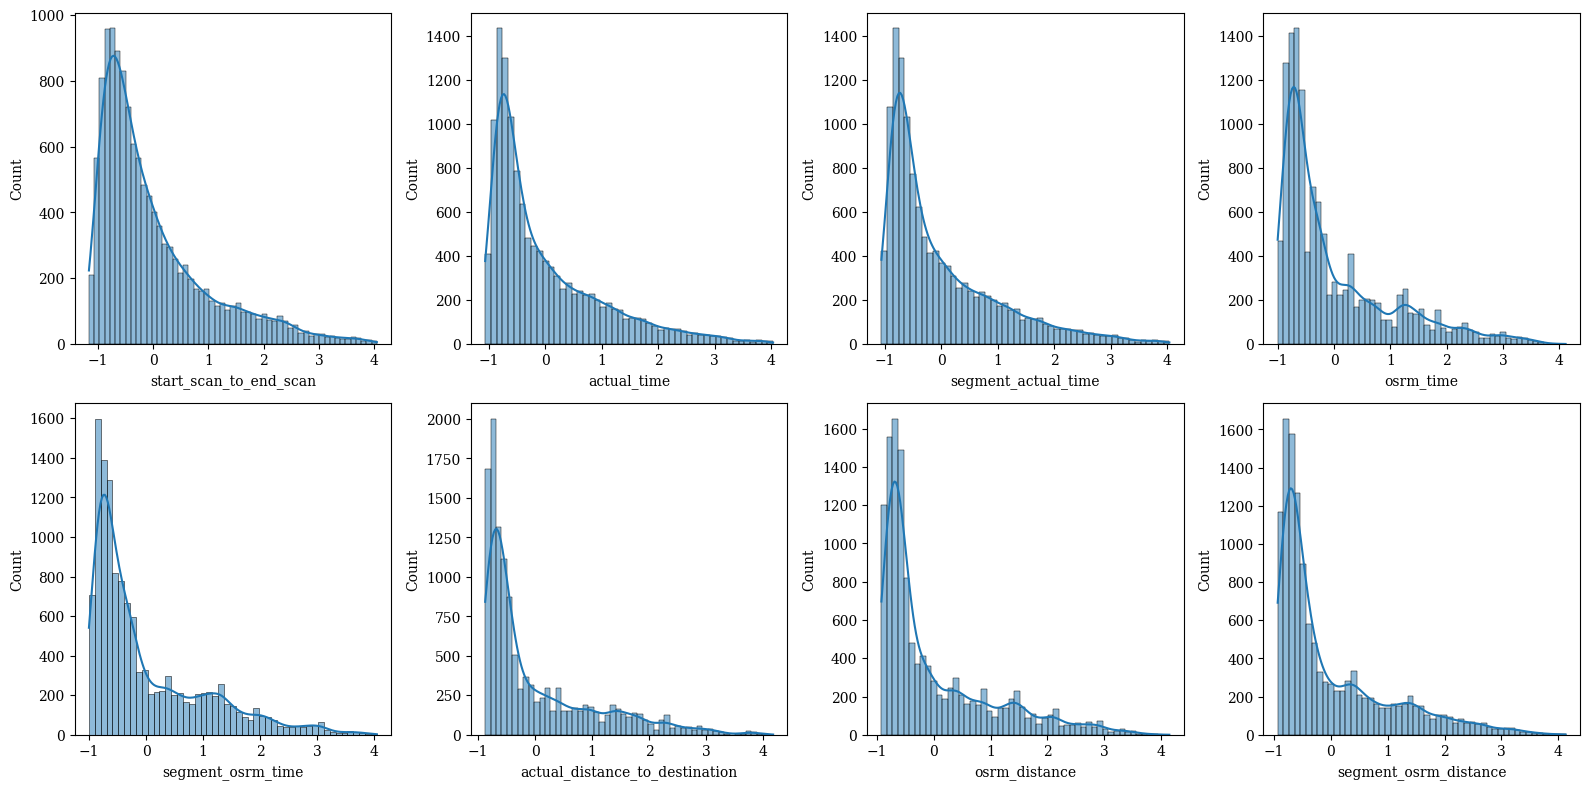

In [106]:
#Distribution plots of standarised continuous features

fig, ax = plt.subplots(2,4, figsize=(16,8))

sns.histplot(data=new_trip['start_scan_to_end_scan'], kde=True, ax=ax[0,0])
sns.histplot(data=new_trip['actual_time'], kde=True, ax=ax[0,1])
sns.histplot(data=new_trip['segment_actual_time'], kde=True, ax=ax[0,2])
sns.histplot(data=new_trip['osrm_time'], kde=True, ax=ax[0,3])
sns.histplot(data=new_trip['segment_osrm_time'], kde=True, ax=ax[1,0])
sns.histplot(data=new_trip['actual_distance_to_destination'], kde=True, ax=ax[1,1])
sns.histplot(data=new_trip['osrm_distance'], kde=True, ax=ax[1,2])
sns.histplot(data=new_trip['segment_osrm_distance'], kde=True, ax=ax[1,3])

plt.tight_layout()
plt.show()